# HOUSING: PRICE PREDICTION

In [1]:
# importing requried libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [3]:
data.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1163,289,20,RL,NaN,9819,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,122000
1164,554,20,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2009,WD,Normal,108000
1165,196,160,RL,24.0,2280,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,148500
1166,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000
1167,617,60,RL,NaN,7861,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,183200


In [4]:
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

In [5]:
data.shape

(1168, 81)

In [6]:
# This dataset has 1168 rows and 81 columns

In [7]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [9]:
# We have Object and Integer data

In [10]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,954.00000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1161.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1104.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,724.136130,56.767979,70.98847,10484.749144,6.104452,5.595890,1970.930651,1984.758562,102.310078,444.726027,46.647260,569.721747,1061.095034,1169.860445,348.826199,6.380137,1525.066781,0.425514,0.055651,1.562500,0.388699,2.884418,1.045377,6.542808,0.617295,1978.193841,1.776541,476.860445,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,2007.804795,181477.005993
std,416.159877,41.940650,24.82875,8957.442311,1.390153,1.124343,30.145255,20.785185,182.595606,462.664785,163.520016,449.375525,442.272249,391.161983,439.696370,50.892844,528.042957,0.521615,0.236699,0.551882,0.504929,0.817229,0.216292,1.598484,0.650575,24.890704,0.745554,214.466769,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,1.329738,79105.586863
min,1.000000,20.000000,21.00000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,360.500000,20.000000,60.00000,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,0.000000,216.000000,799.000000,892.000000,0.000000,0.000000,1143.250000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,338.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,714.500000,50.000000,70.00000,9522.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,385.500000,0.000000,474.000000,1005.500000,1096.500000,0.000000,0.000000,1468.500000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,1079.500000,70.000000,80.00000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,160.000000,714.500000,0.000000,816.000000,1291.500000,1392.000000,729.000000,0.000000,1795.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,313.00000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [11]:
data.nunique()

Id               1168
MSSubClass         15
MSZoning            5
LotFrontage       106
LotArea           892
Street              2
Alley               2
LotShape            4
LandContour         4
Utilities           1
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         110
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        14
Exterior2nd        15
MasVnrType          4
MasVnrArea        283
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        551
BsmtFinType2        6
BsmtFinSF2        122
BsmtUnfSF         681
TotalBsmtSF       636
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          669
2ndFlrSF          351
LowQualFin

In [12]:
data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


# Null value check

<AxesSubplot:>

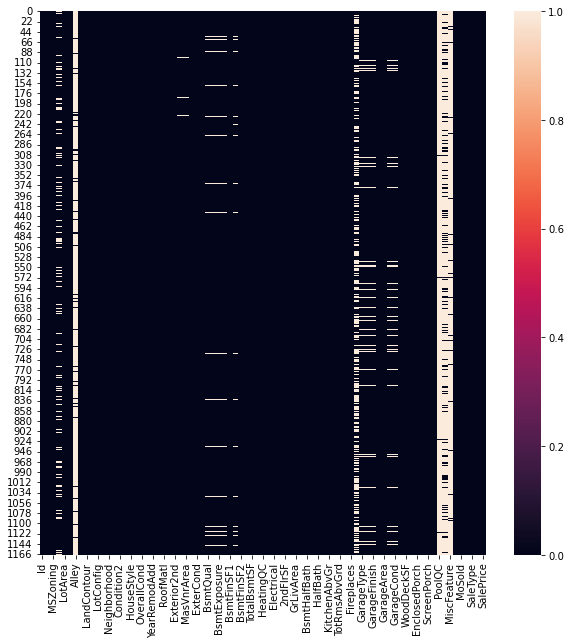

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(data.isnull())

In [14]:
data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       214
LotArea             0
Street              0
Alley            1091
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          7
MasVnrArea          7
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           30
BsmtCond           30
BsmtExposure       31
BsmtFinType1       30
BsmtFinSF1          0
BsmtFinType2       31
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

# Null value treatment

In [15]:
# I am using Simple Imputer to treat Null values

In [16]:
data.drop(["PoolQC","MiscFeature","Alley"],inplace=True,axis=1)

In [17]:
cat=["Fence","FireplaceQu","GarageFinish","GarageType","GarageQual","BsmtExposure",
"BsmtFinType2","BsmtQual","BsmtCond","BsmtFinType1",
"MasVnrType","GarageCond"]
num=["LotFrontage","GarageYrBlt","MasVnrArea"]

In [18]:
from sklearn.impute import SimpleImputer

In [19]:
sii = SimpleImputer(strategy="mean")
siii = SimpleImputer(strategy= "most_frequent")
    
for c in cat:
    data[c]  = siii.fit_transform(data[c].values.reshape(-1,1))

for n in num:
    data[n]=sii.fit_transform(data[n].values.reshape(-1,1))

In [20]:
data.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

In [21]:
# Null values are treated

In [22]:
data.columns.to_series().groupby(data.dtypes).groups

{int64: ['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'], float64: ['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], object: ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'G

# Univariate analysis

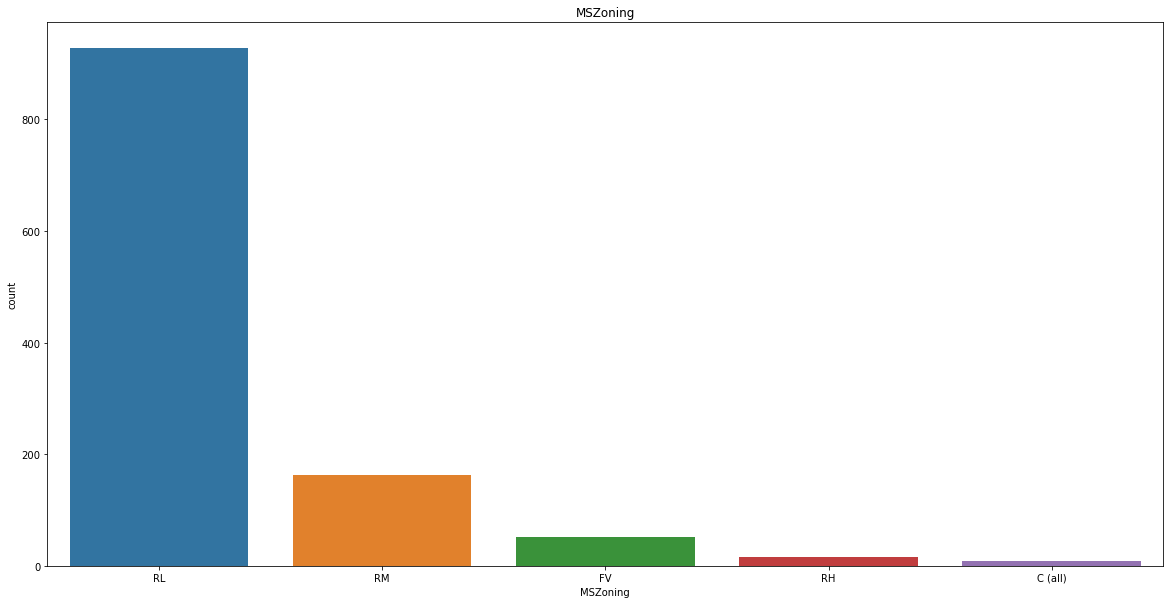

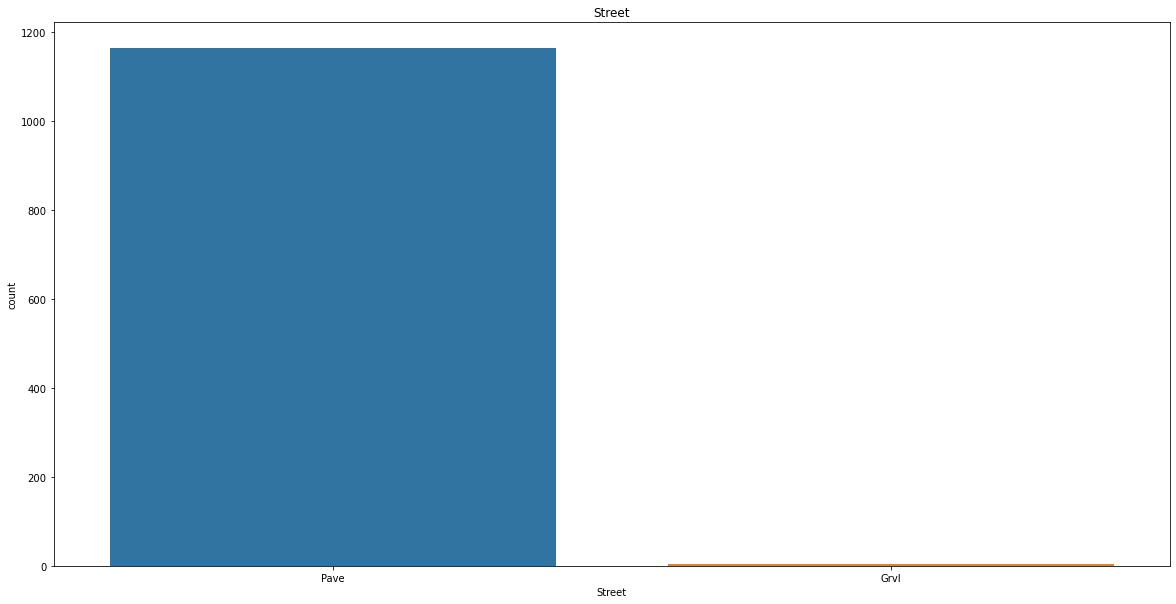

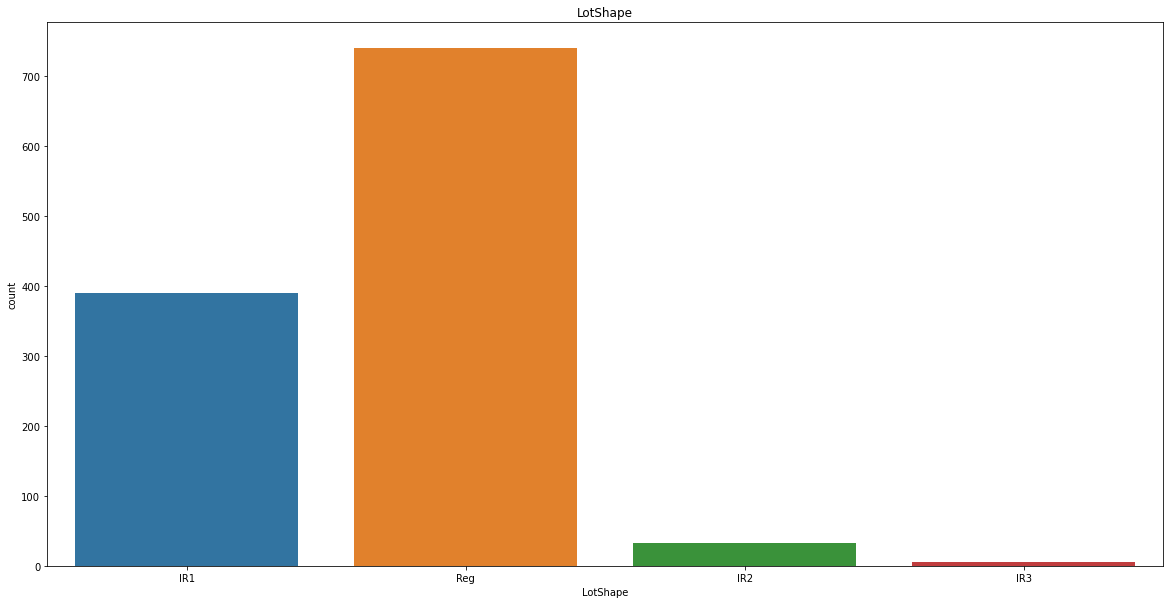

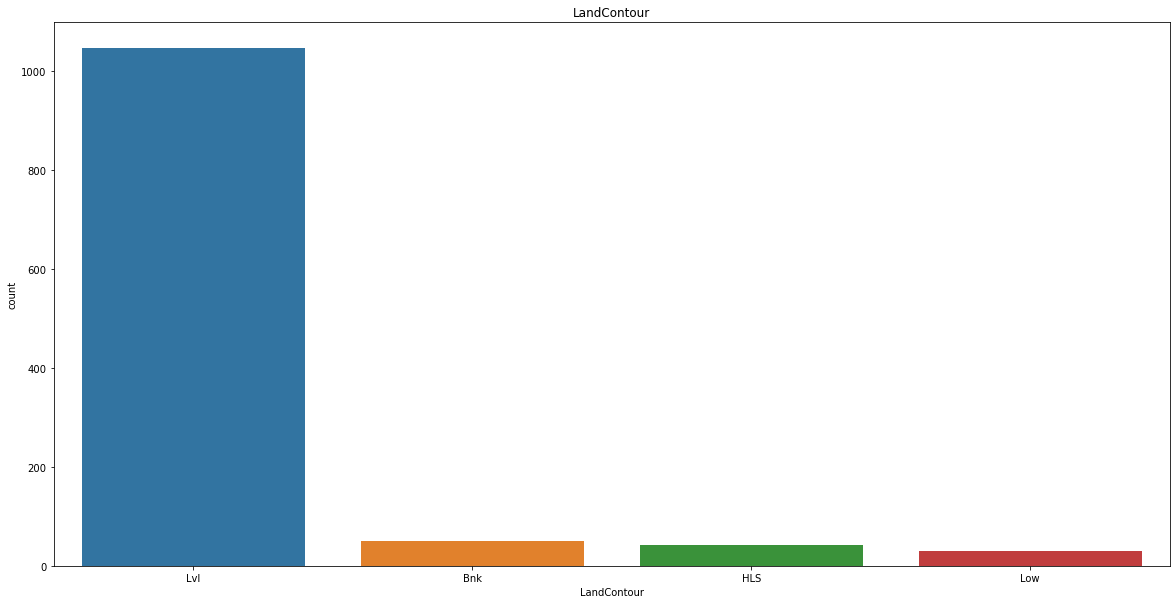

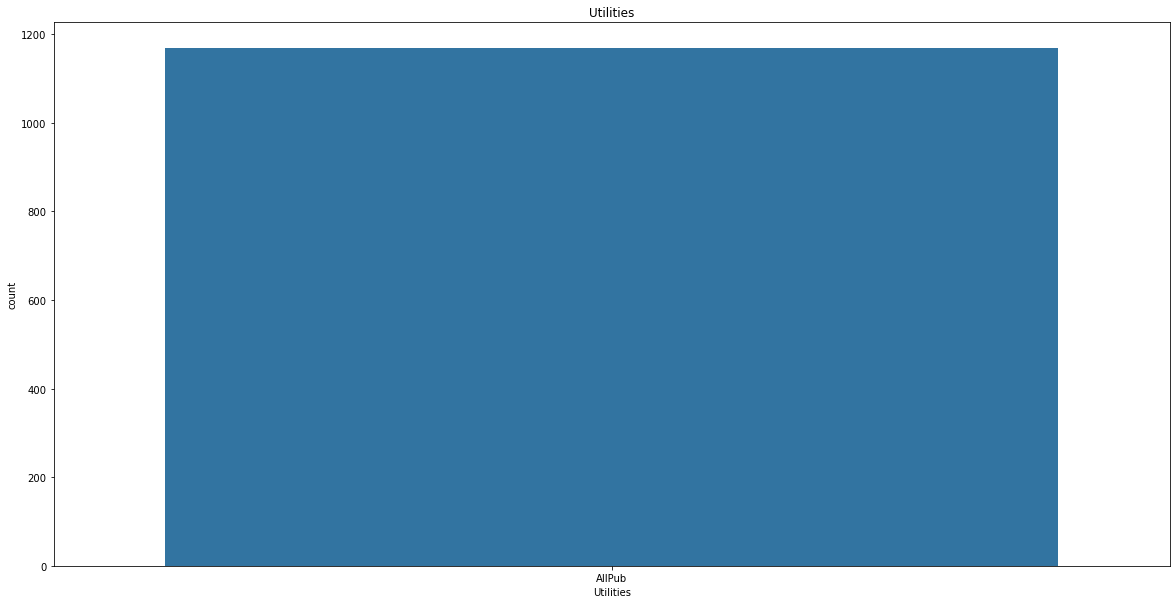

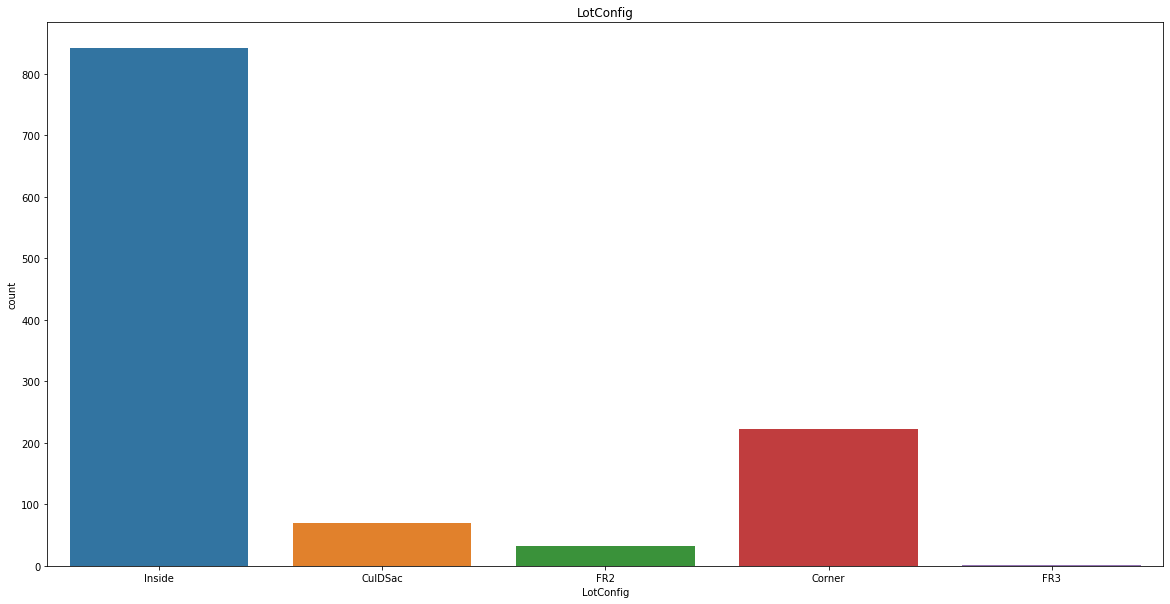

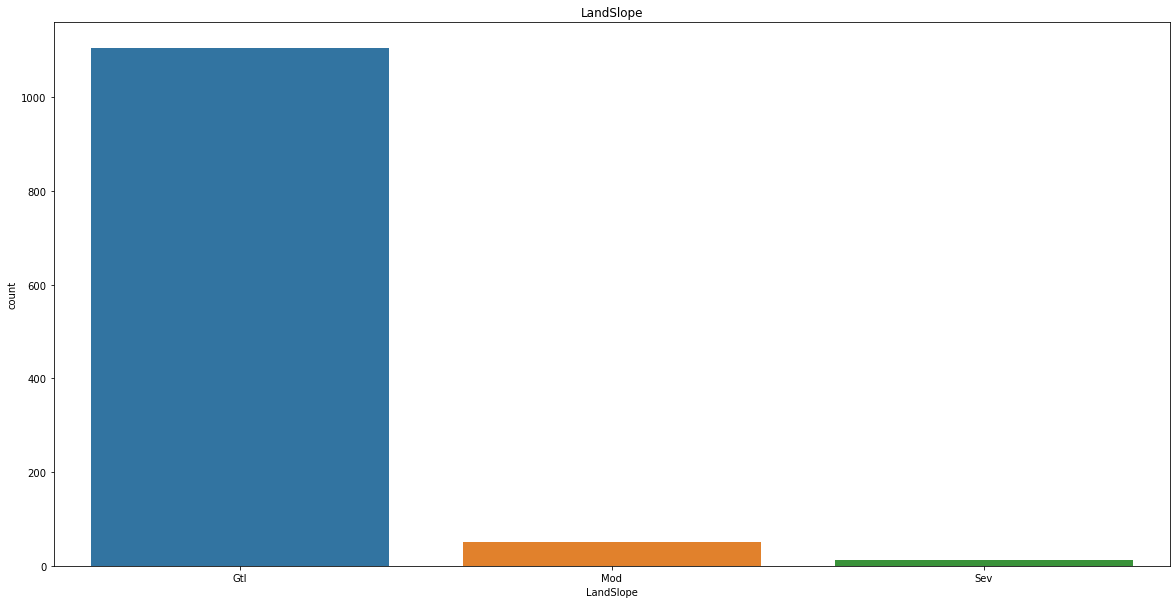

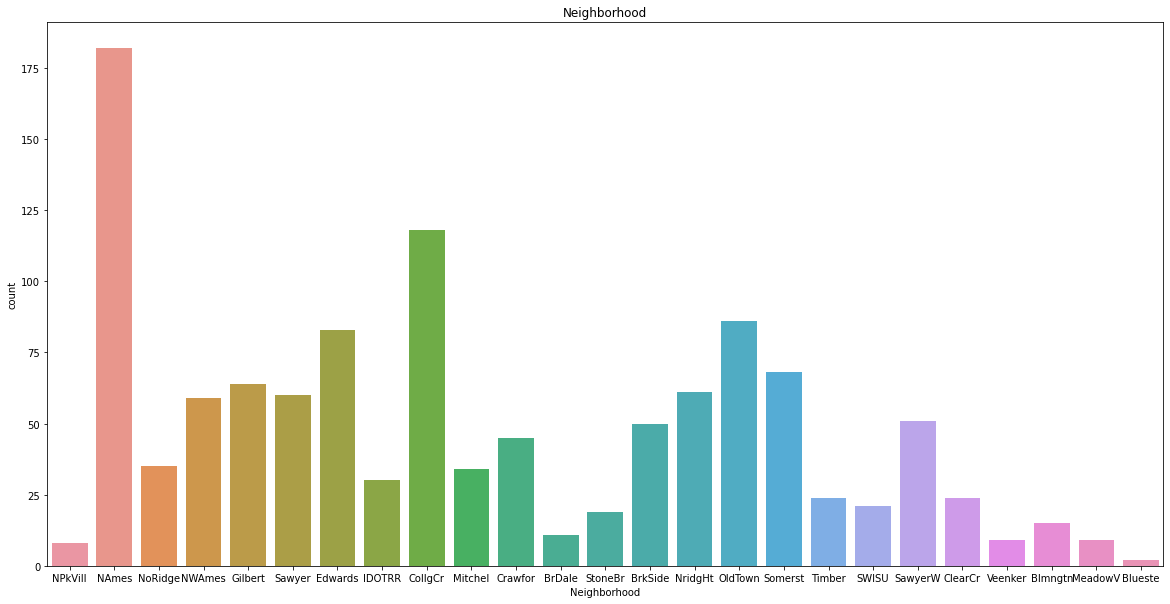

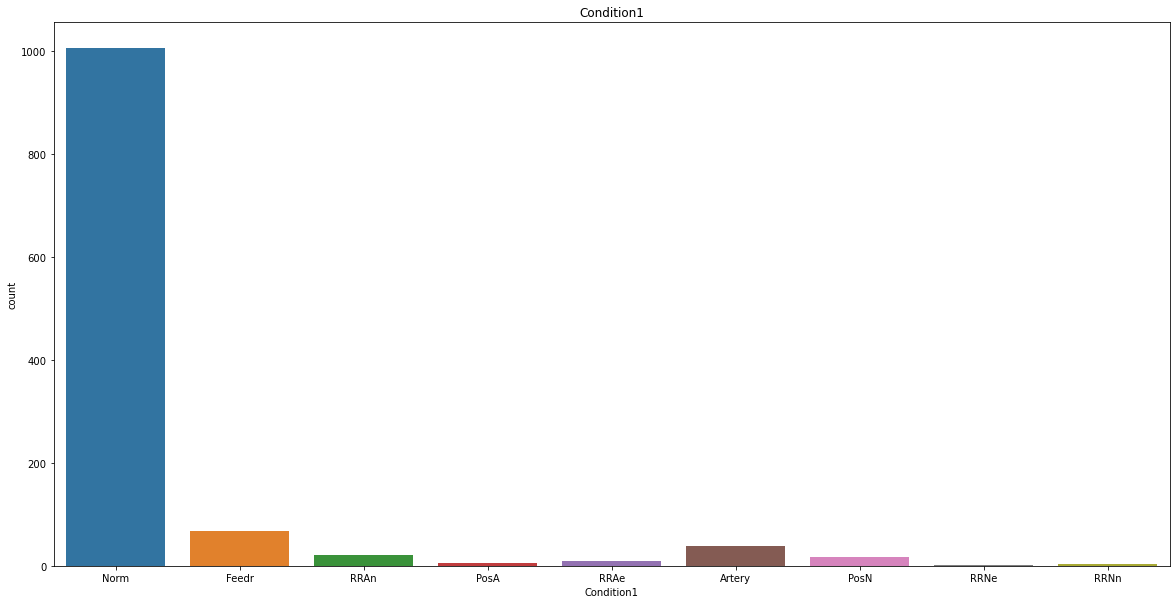

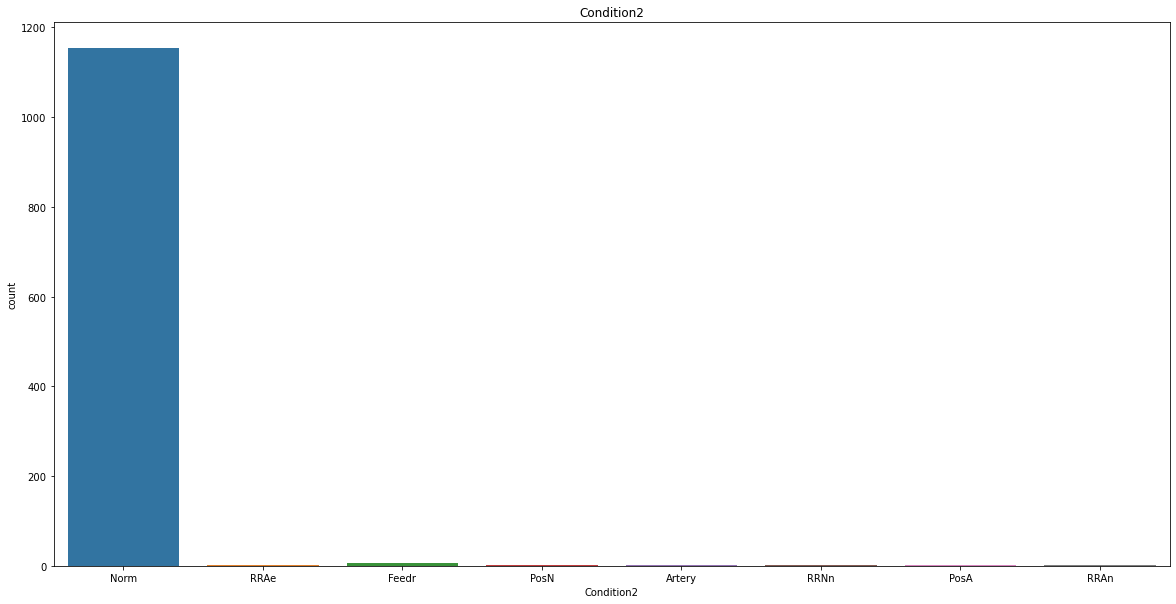

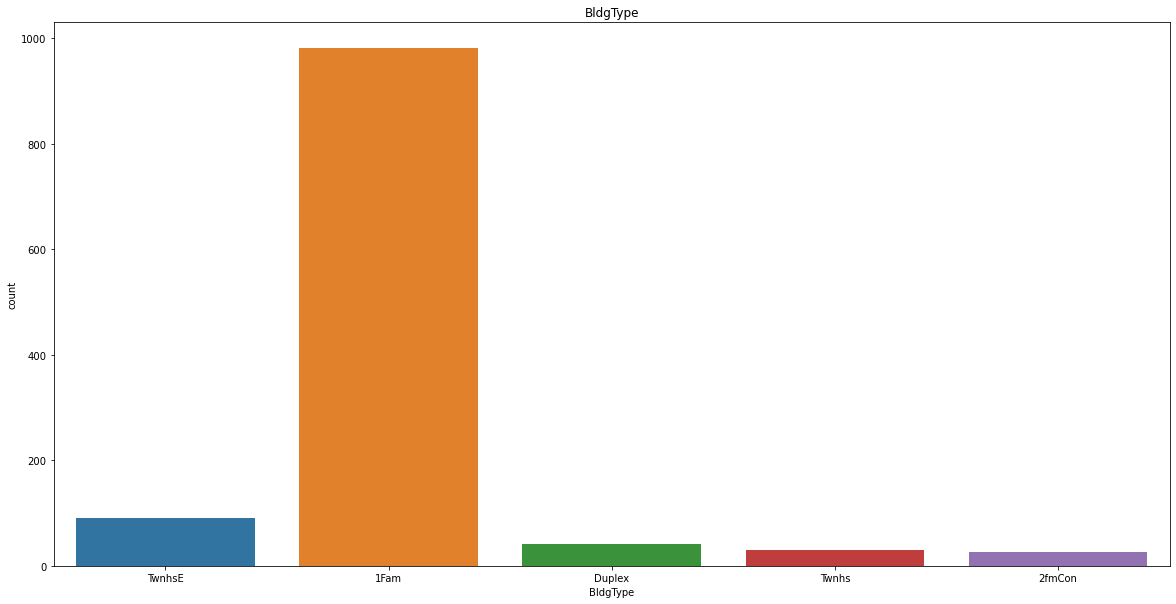

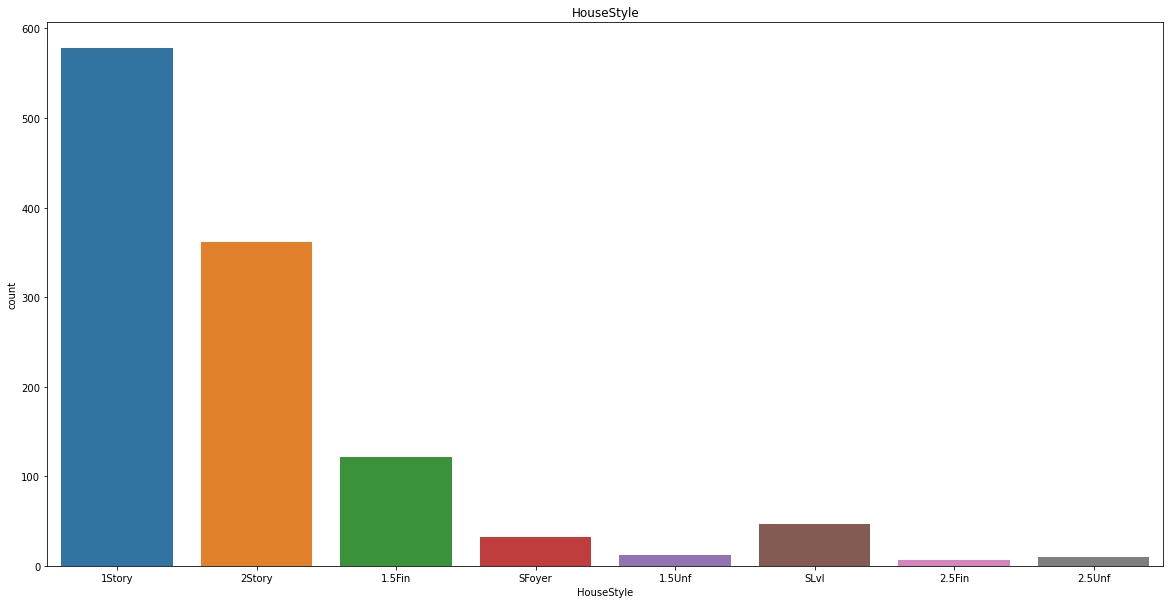

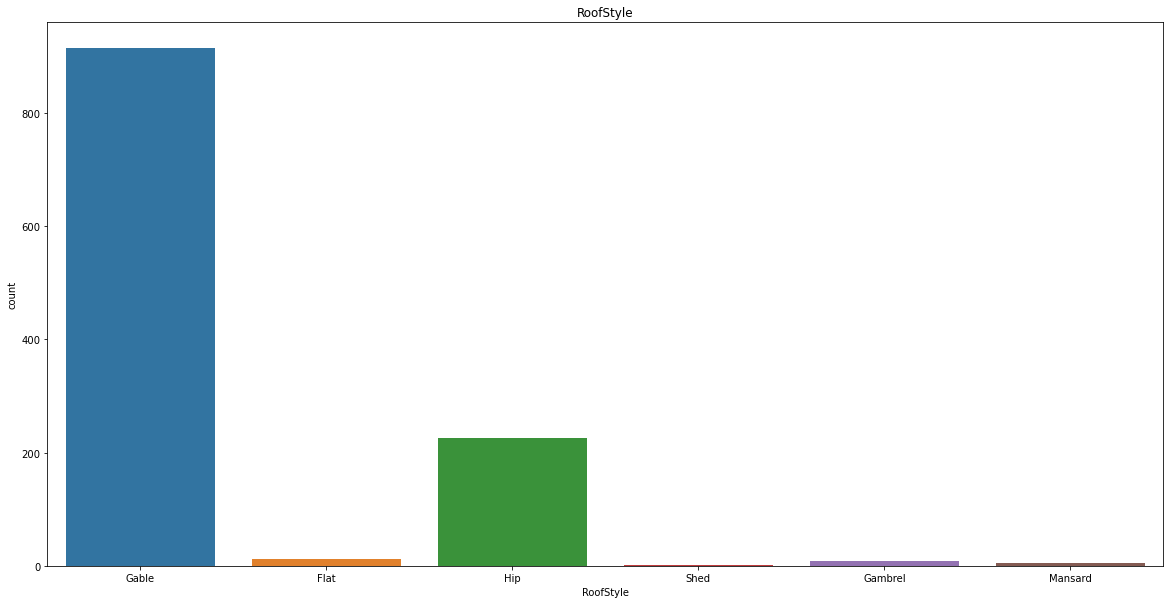

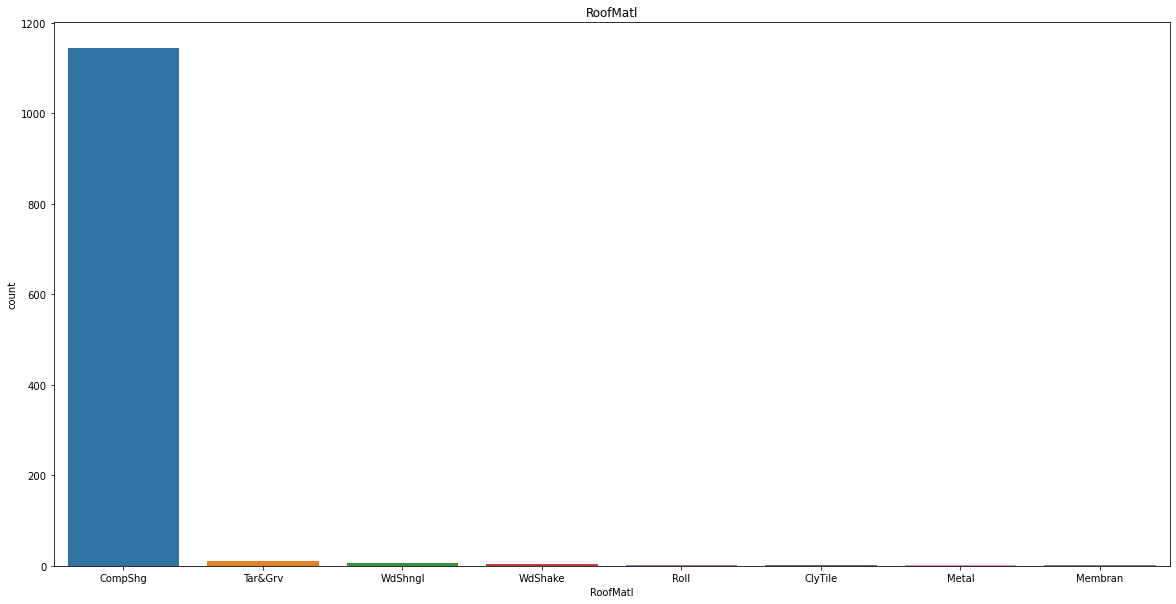

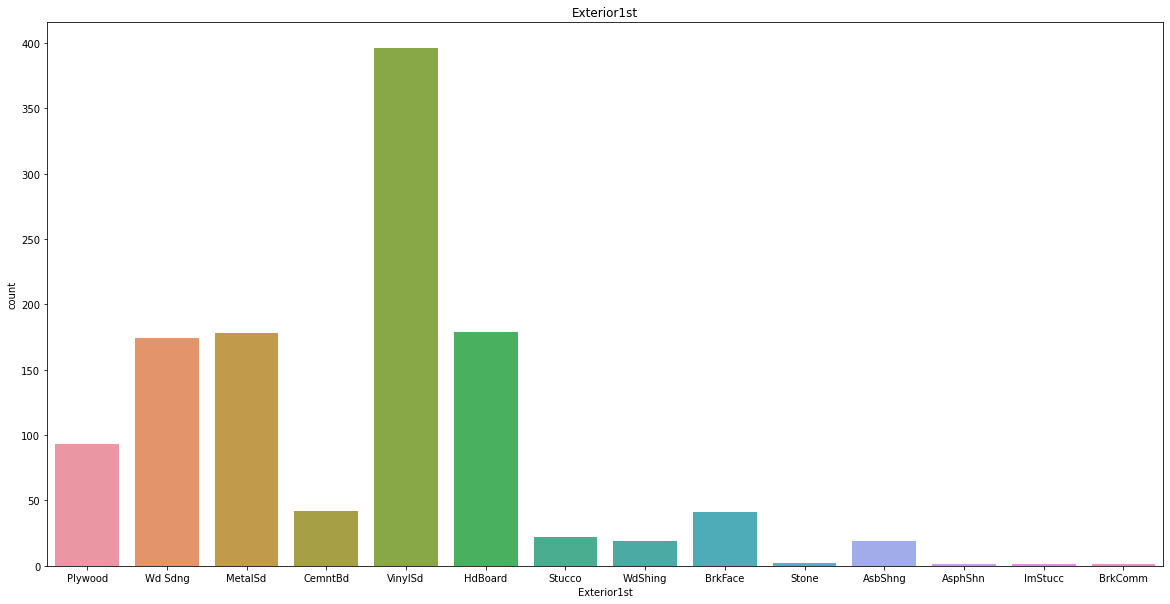

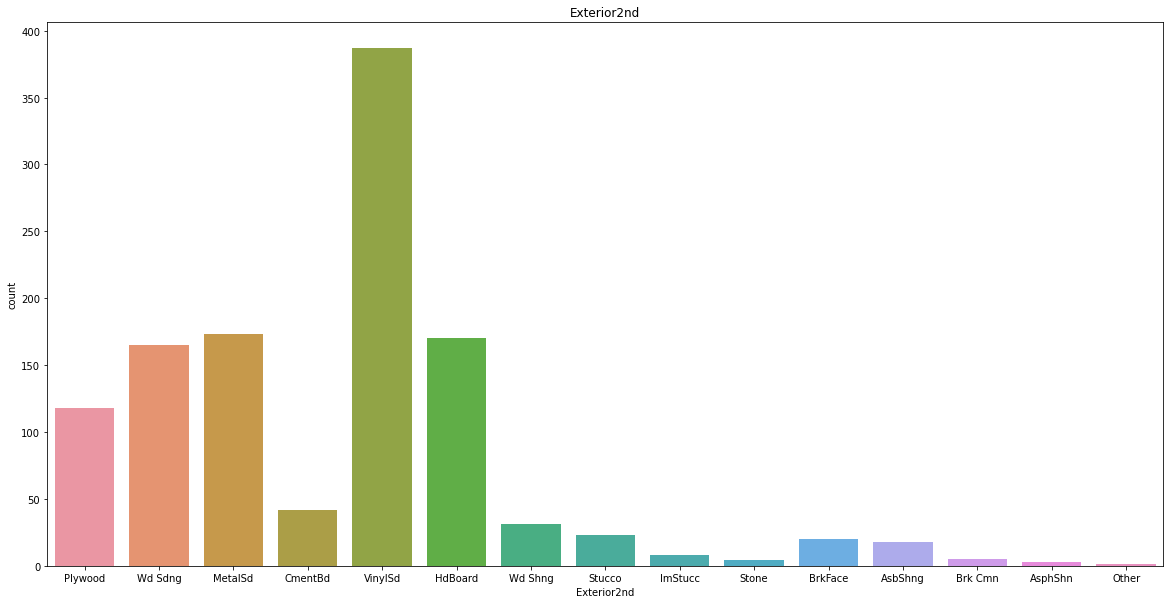

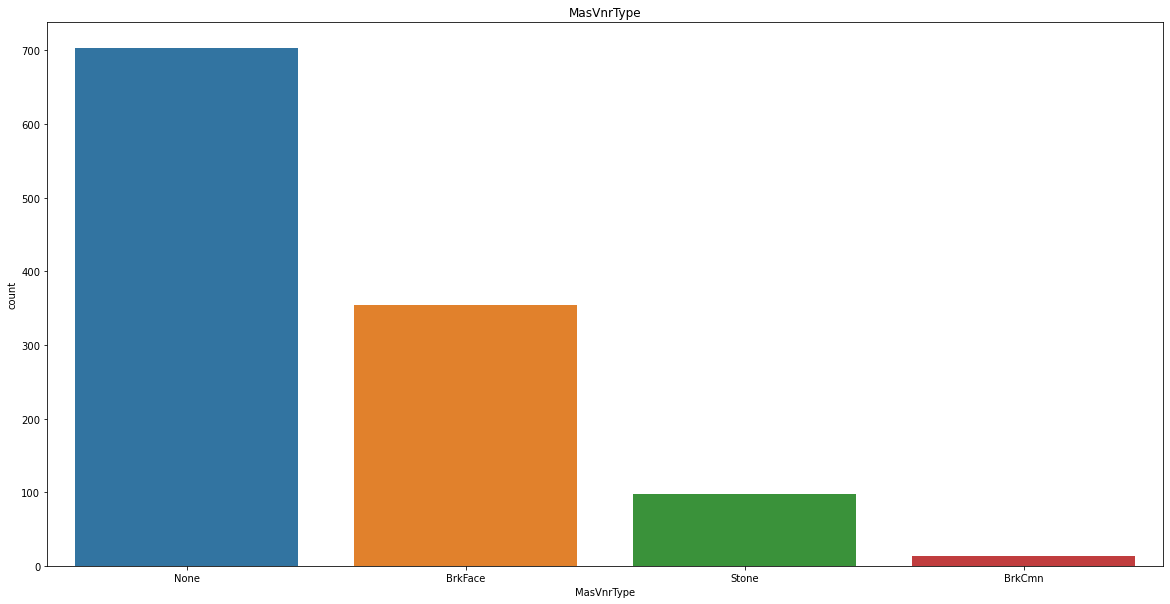

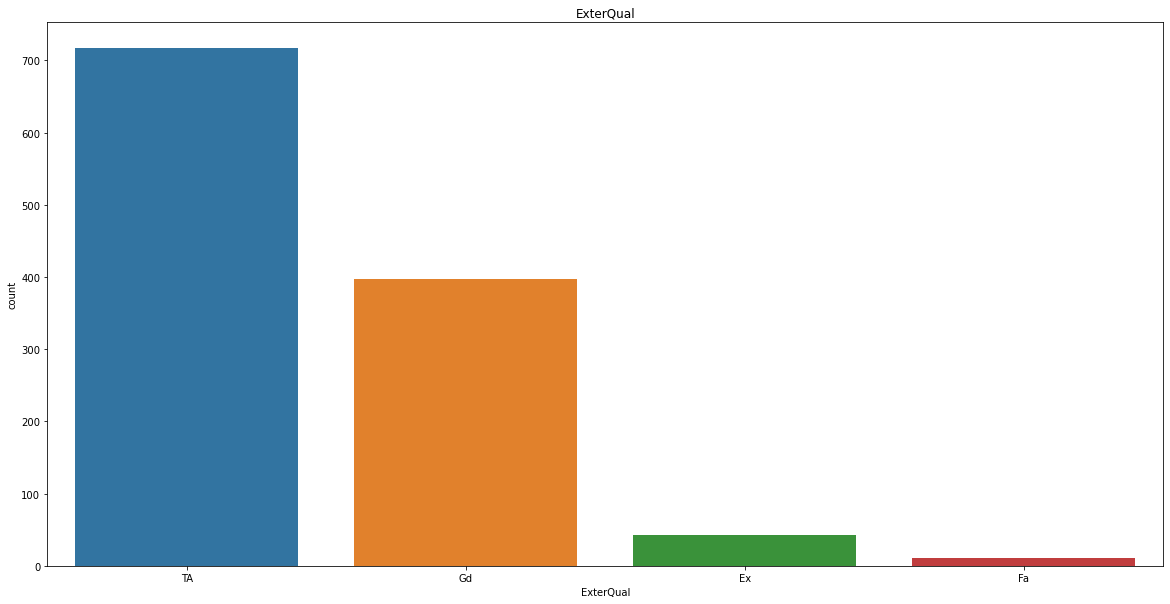

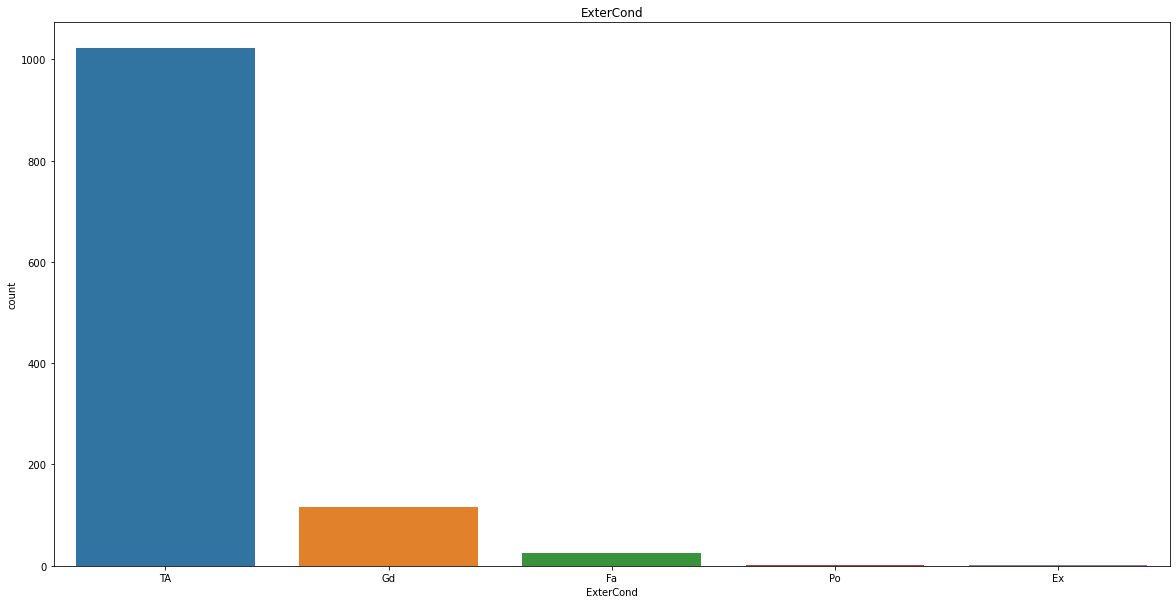

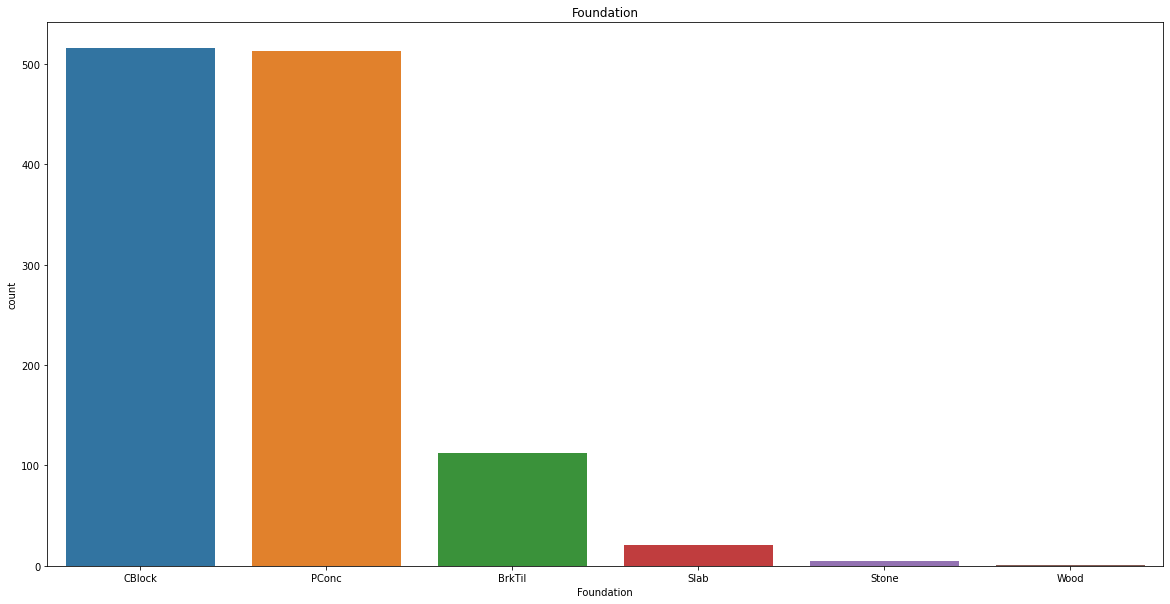

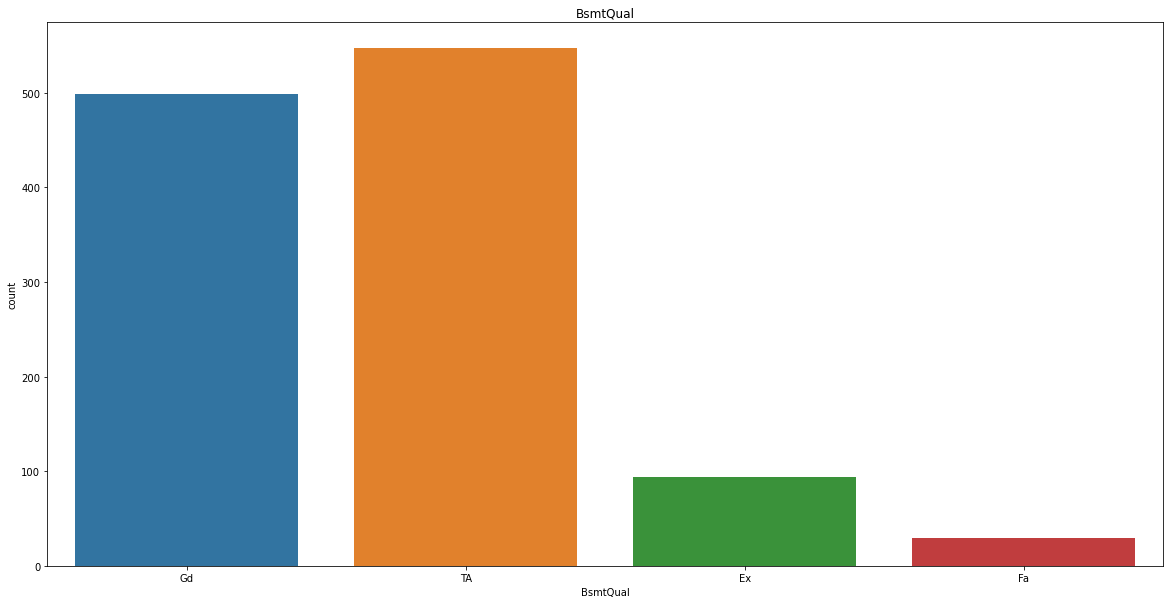

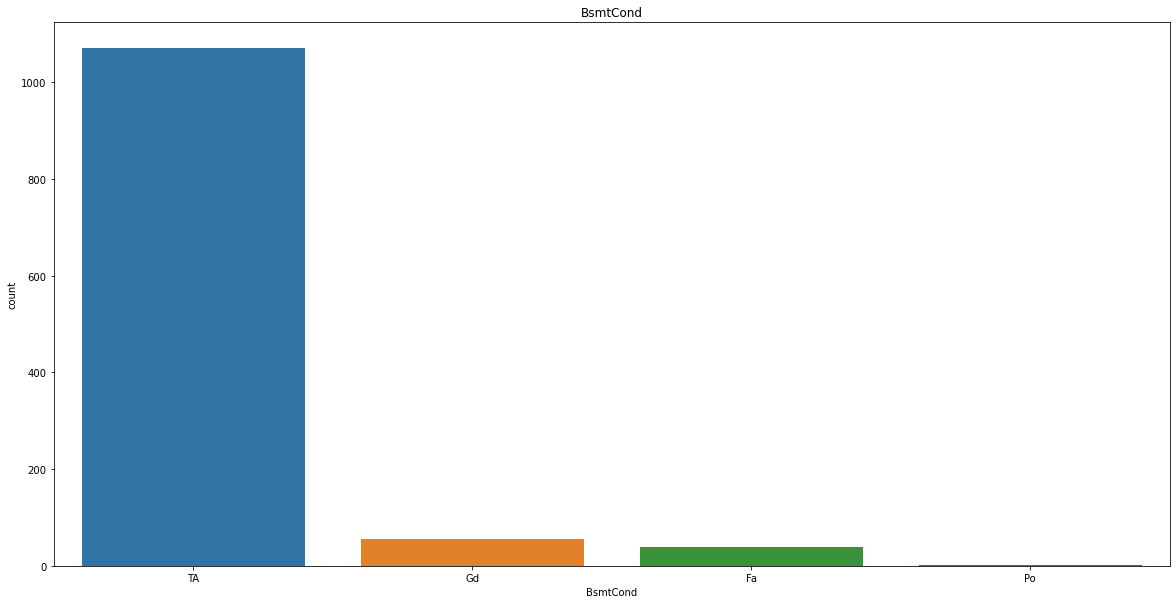

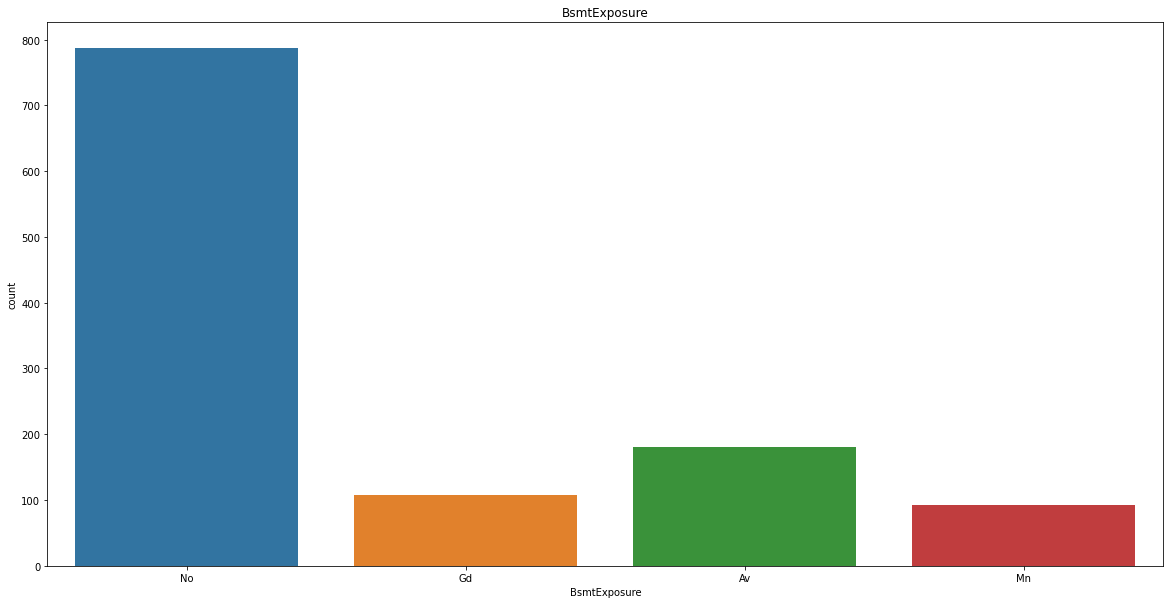

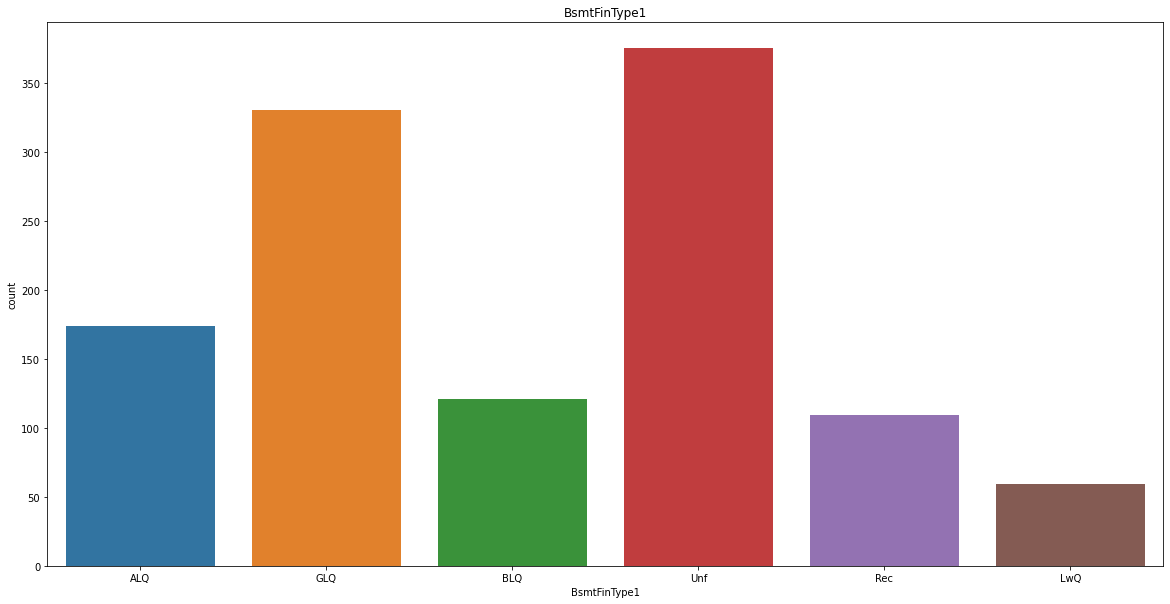

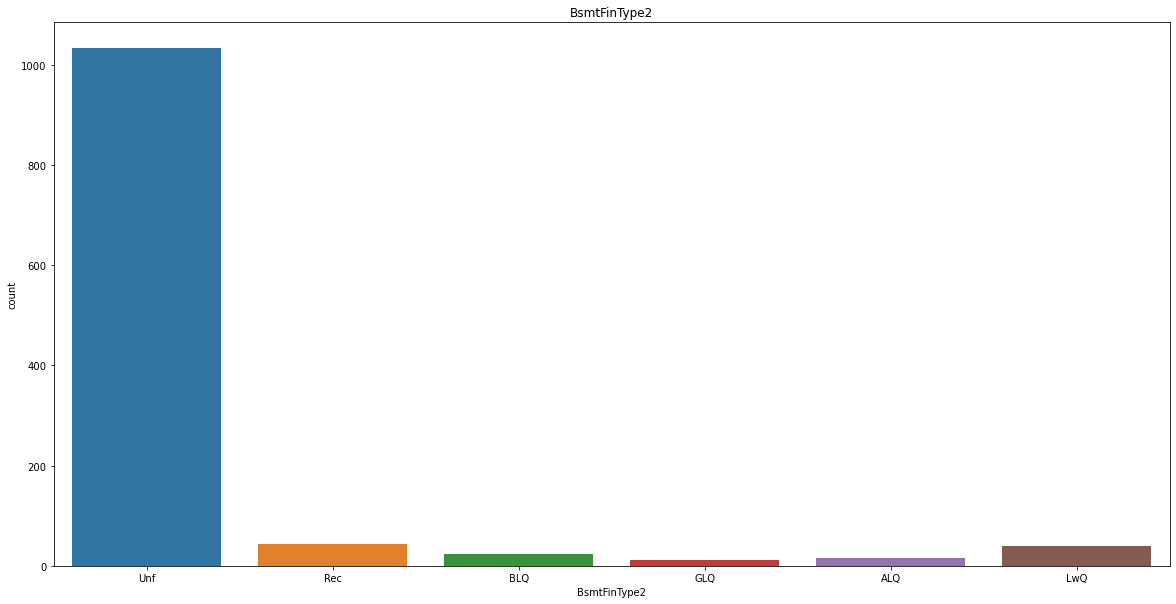

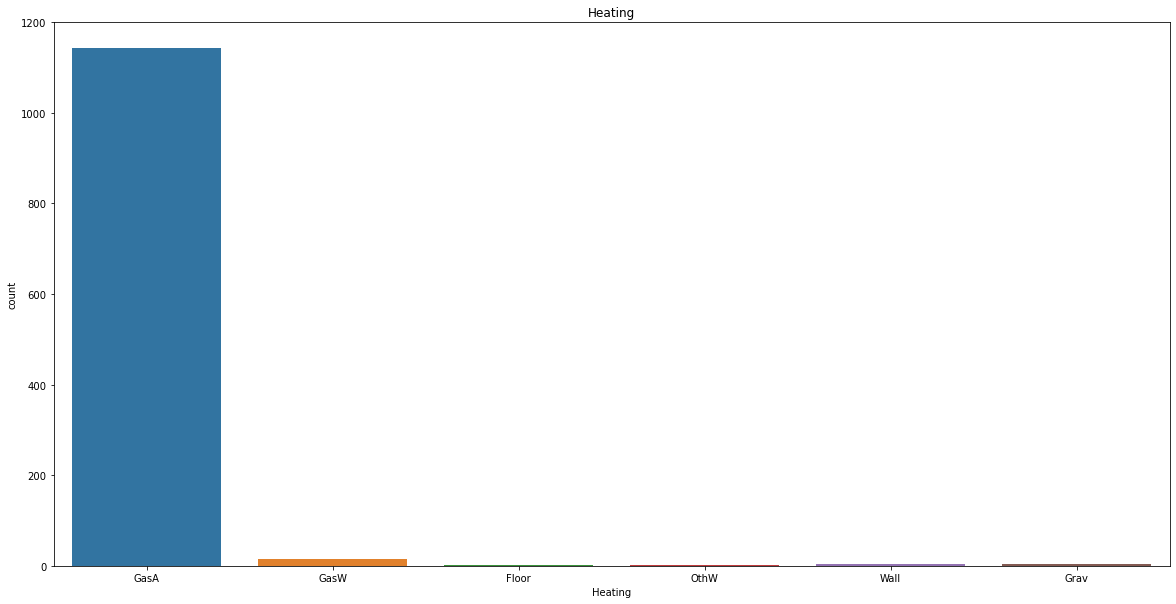

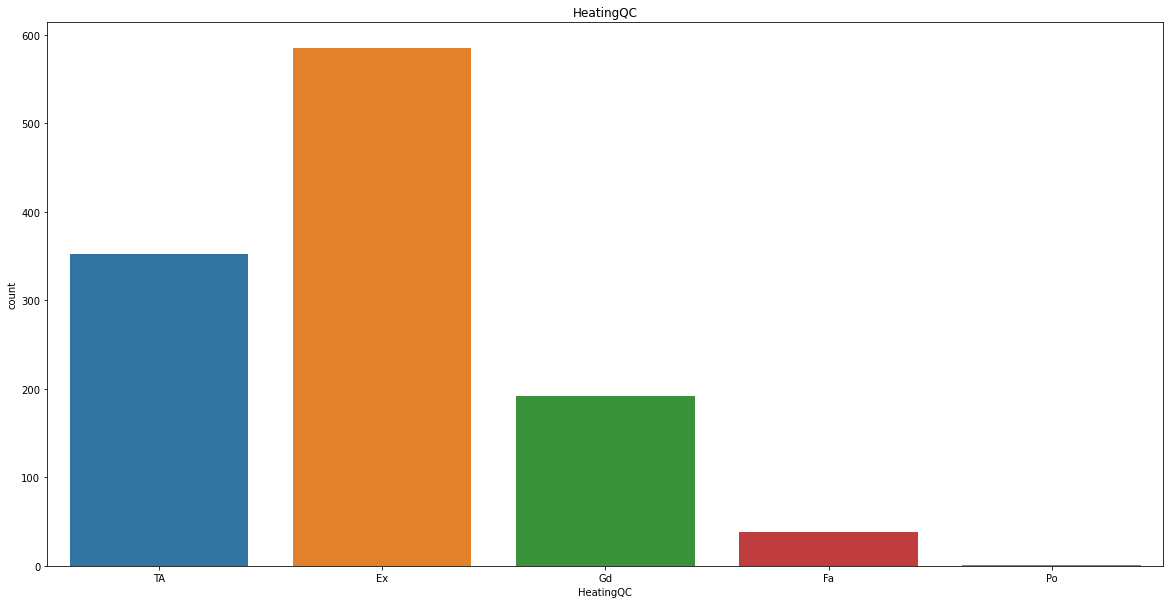

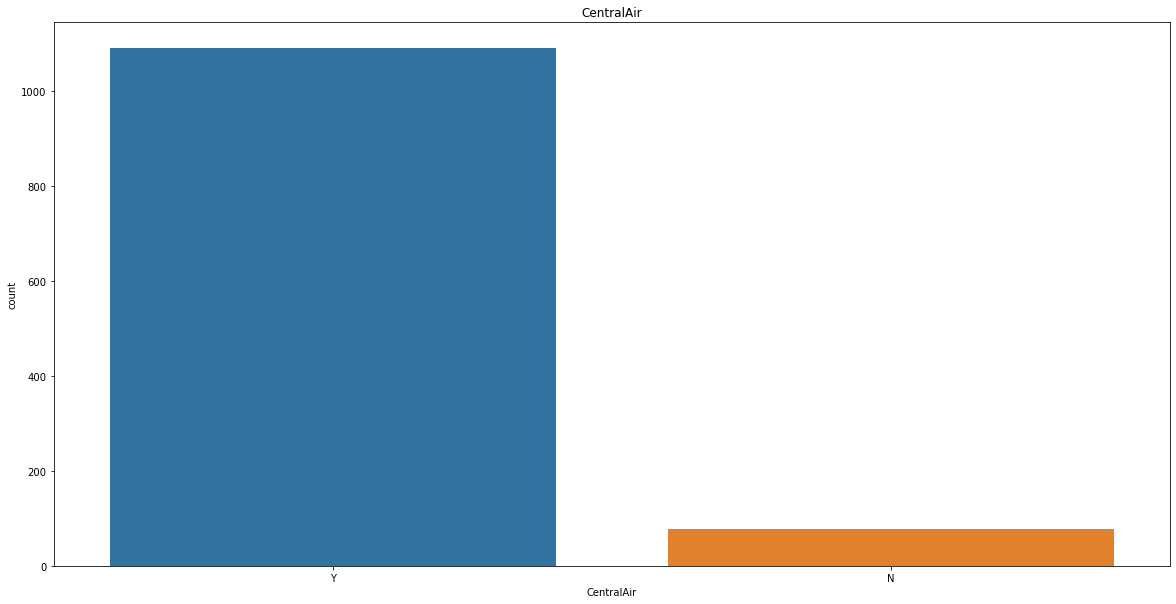

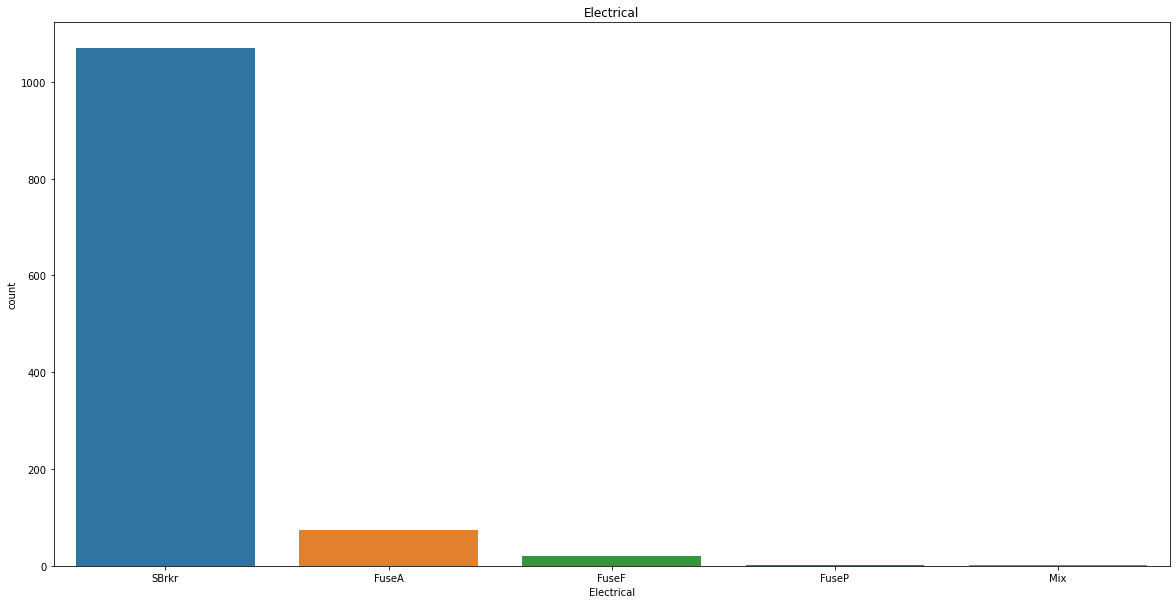

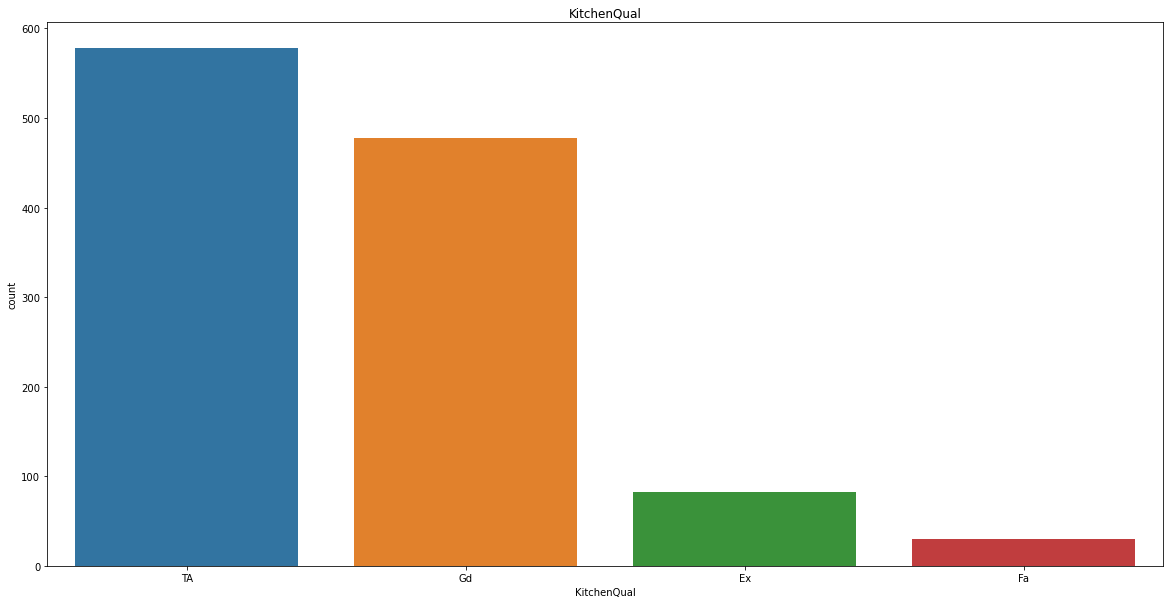

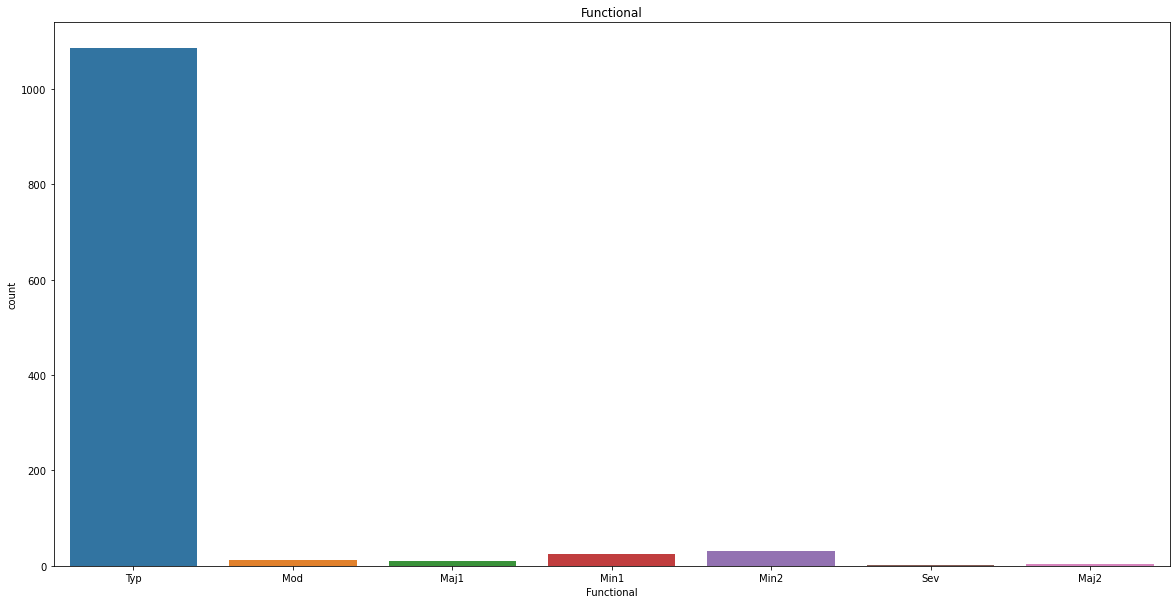

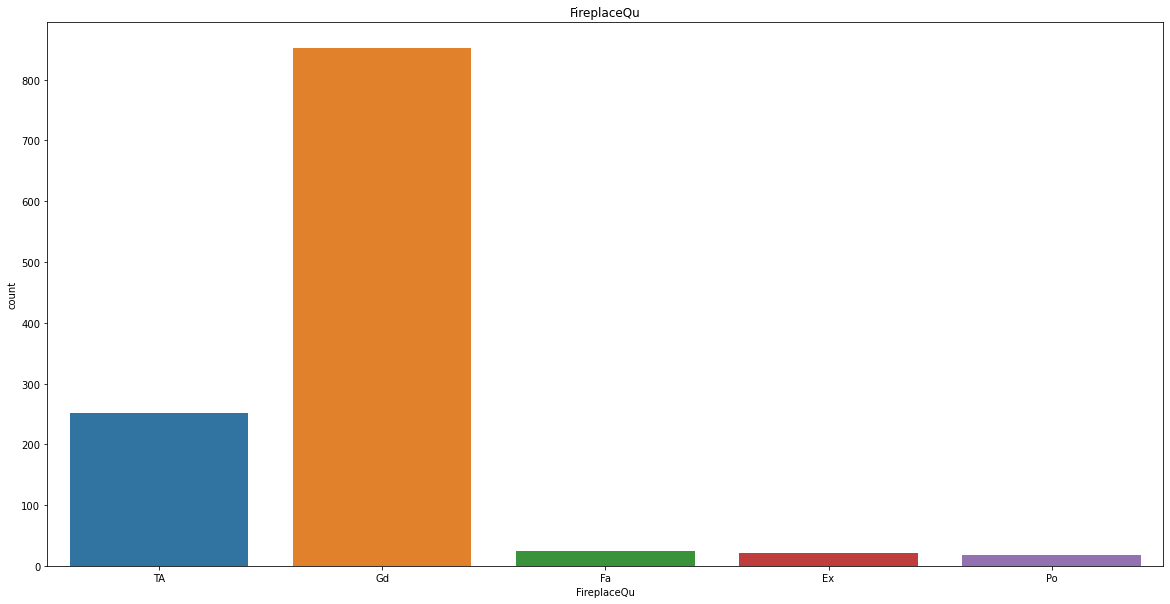

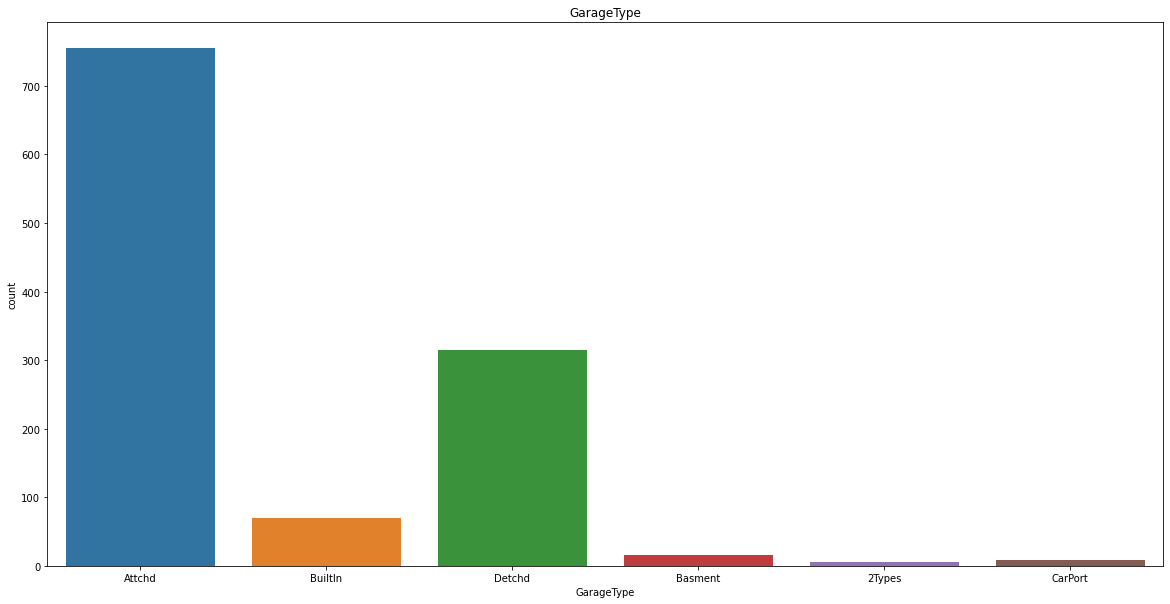

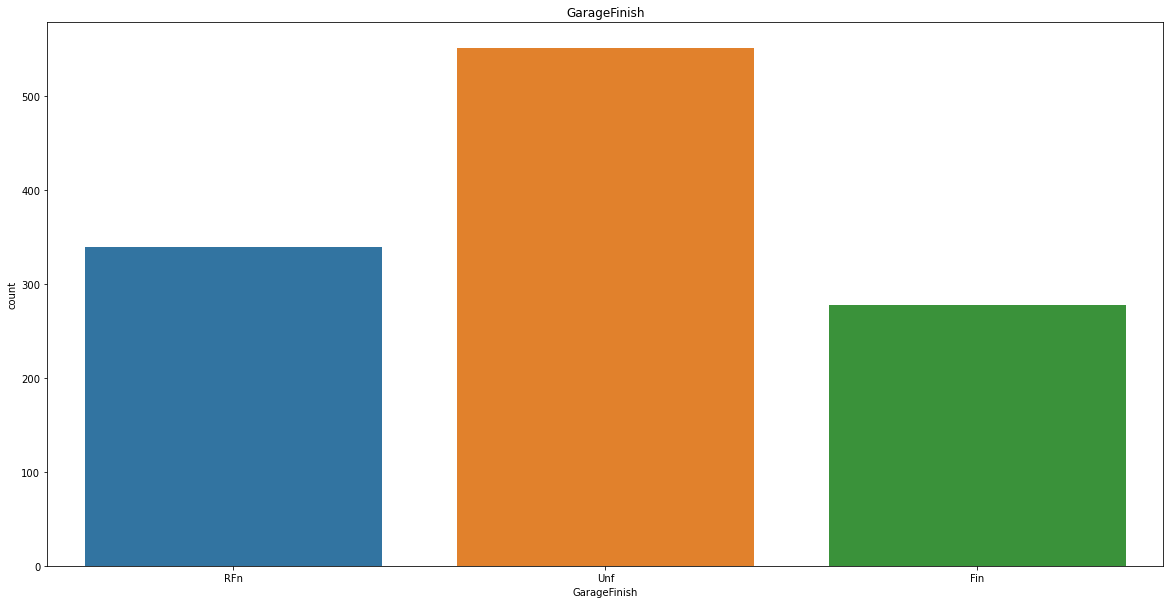

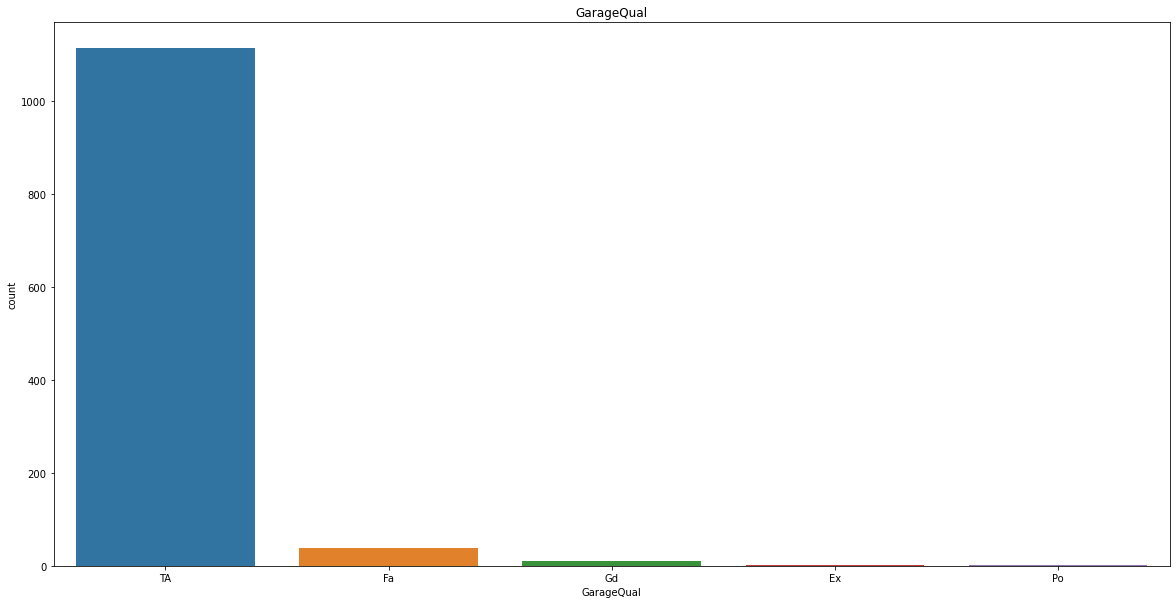

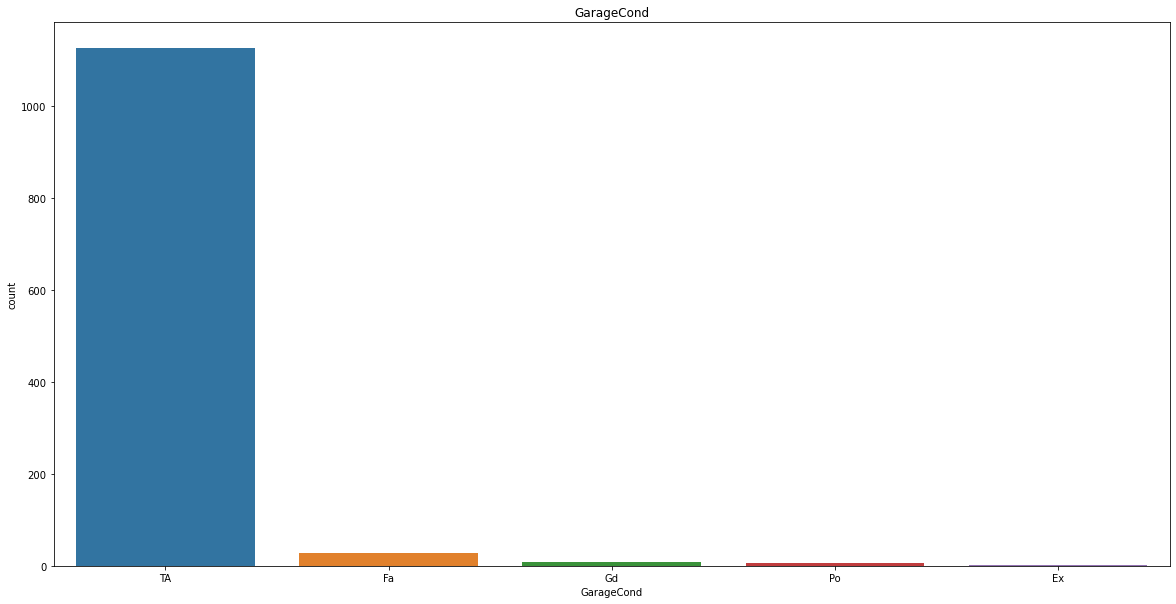

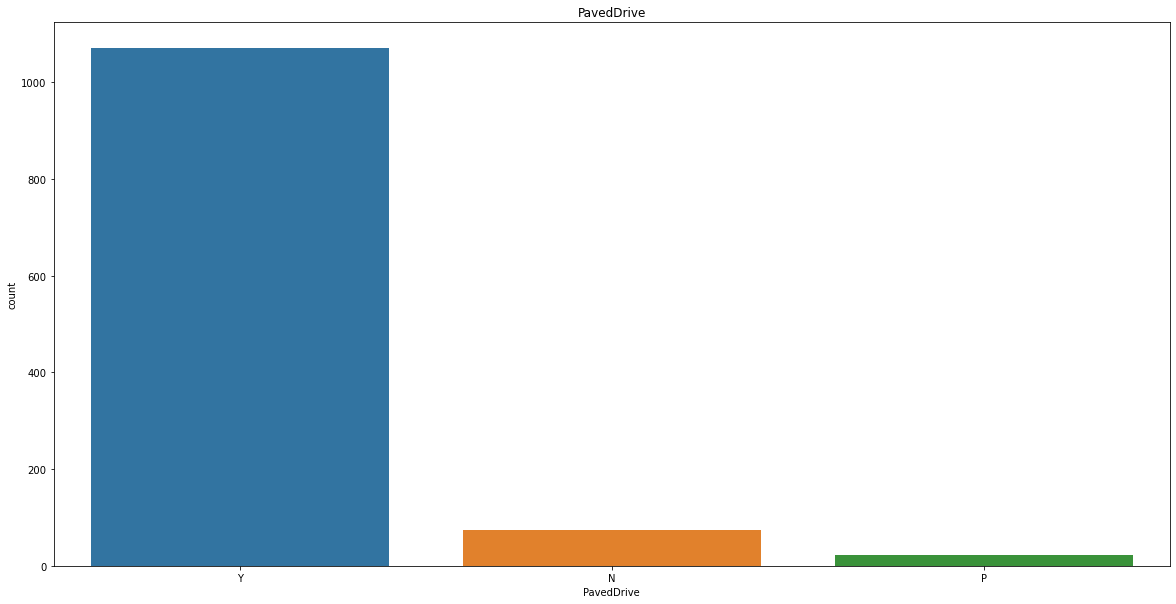

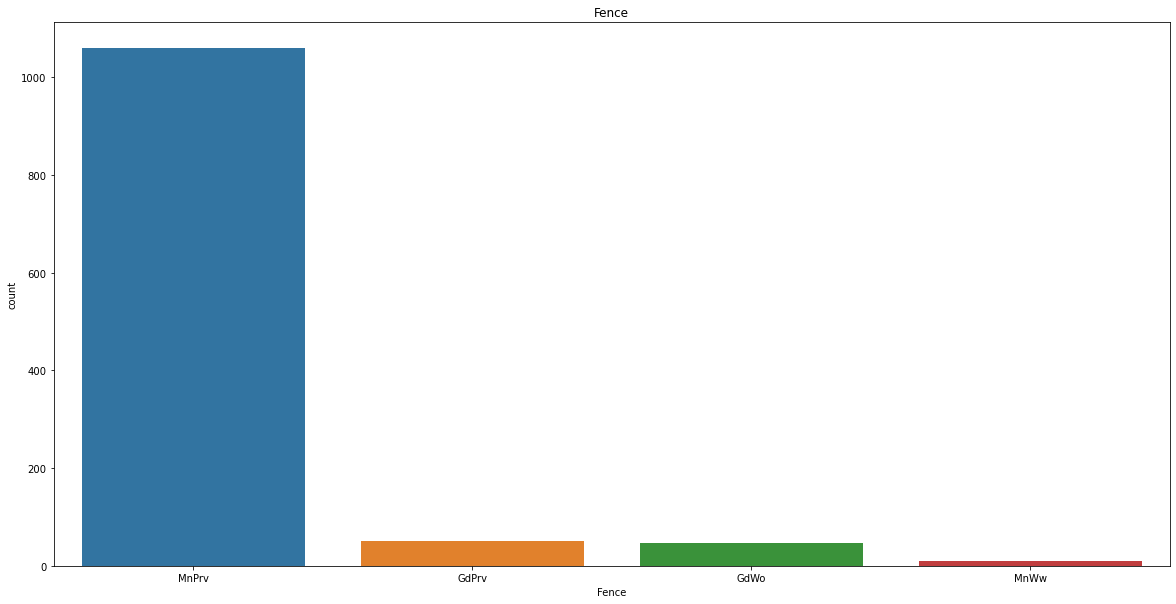

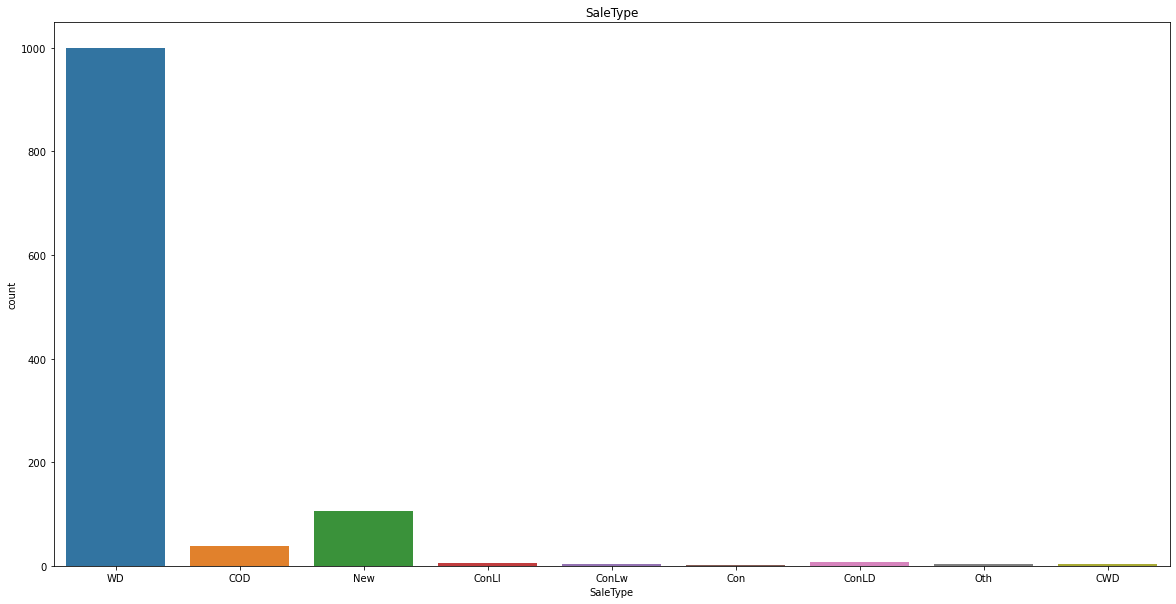

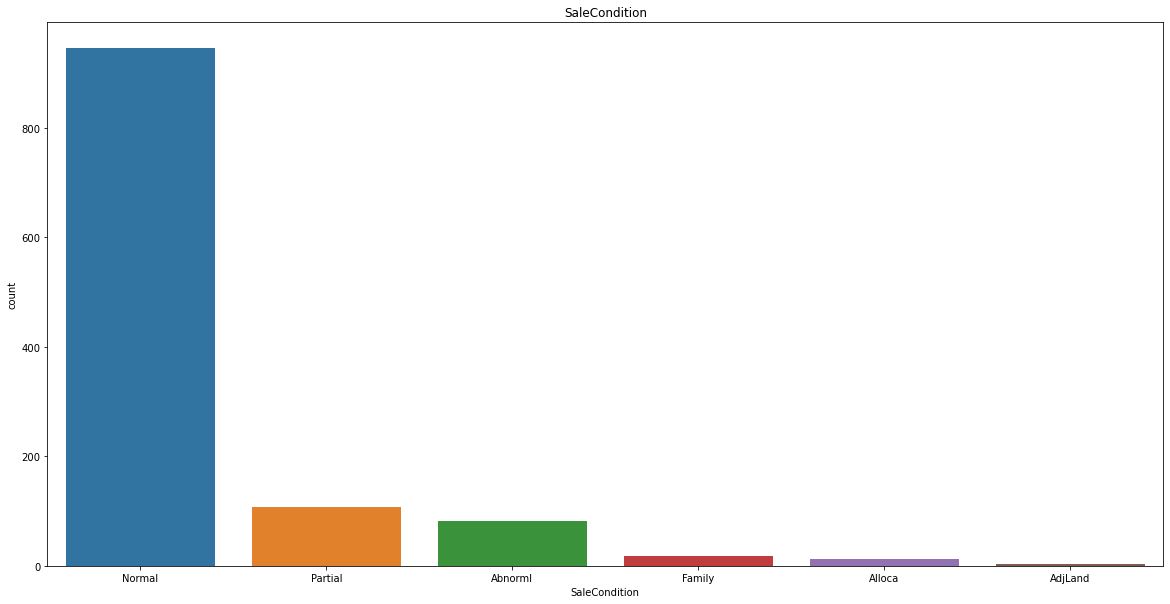

In [23]:
list1=['MSZoning', 'Street', 'LotShape', 'LandContour', 
 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 
 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 
 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 
 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 
 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 
 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence', 
 'SaleType', 'SaleCondition']
for i in list1:
    plt.figure(figsize=(20,10))
    plt.title(i)
    sns.countplot(data[i])
    plt.show()

# Correlation

<AxesSubplot:>

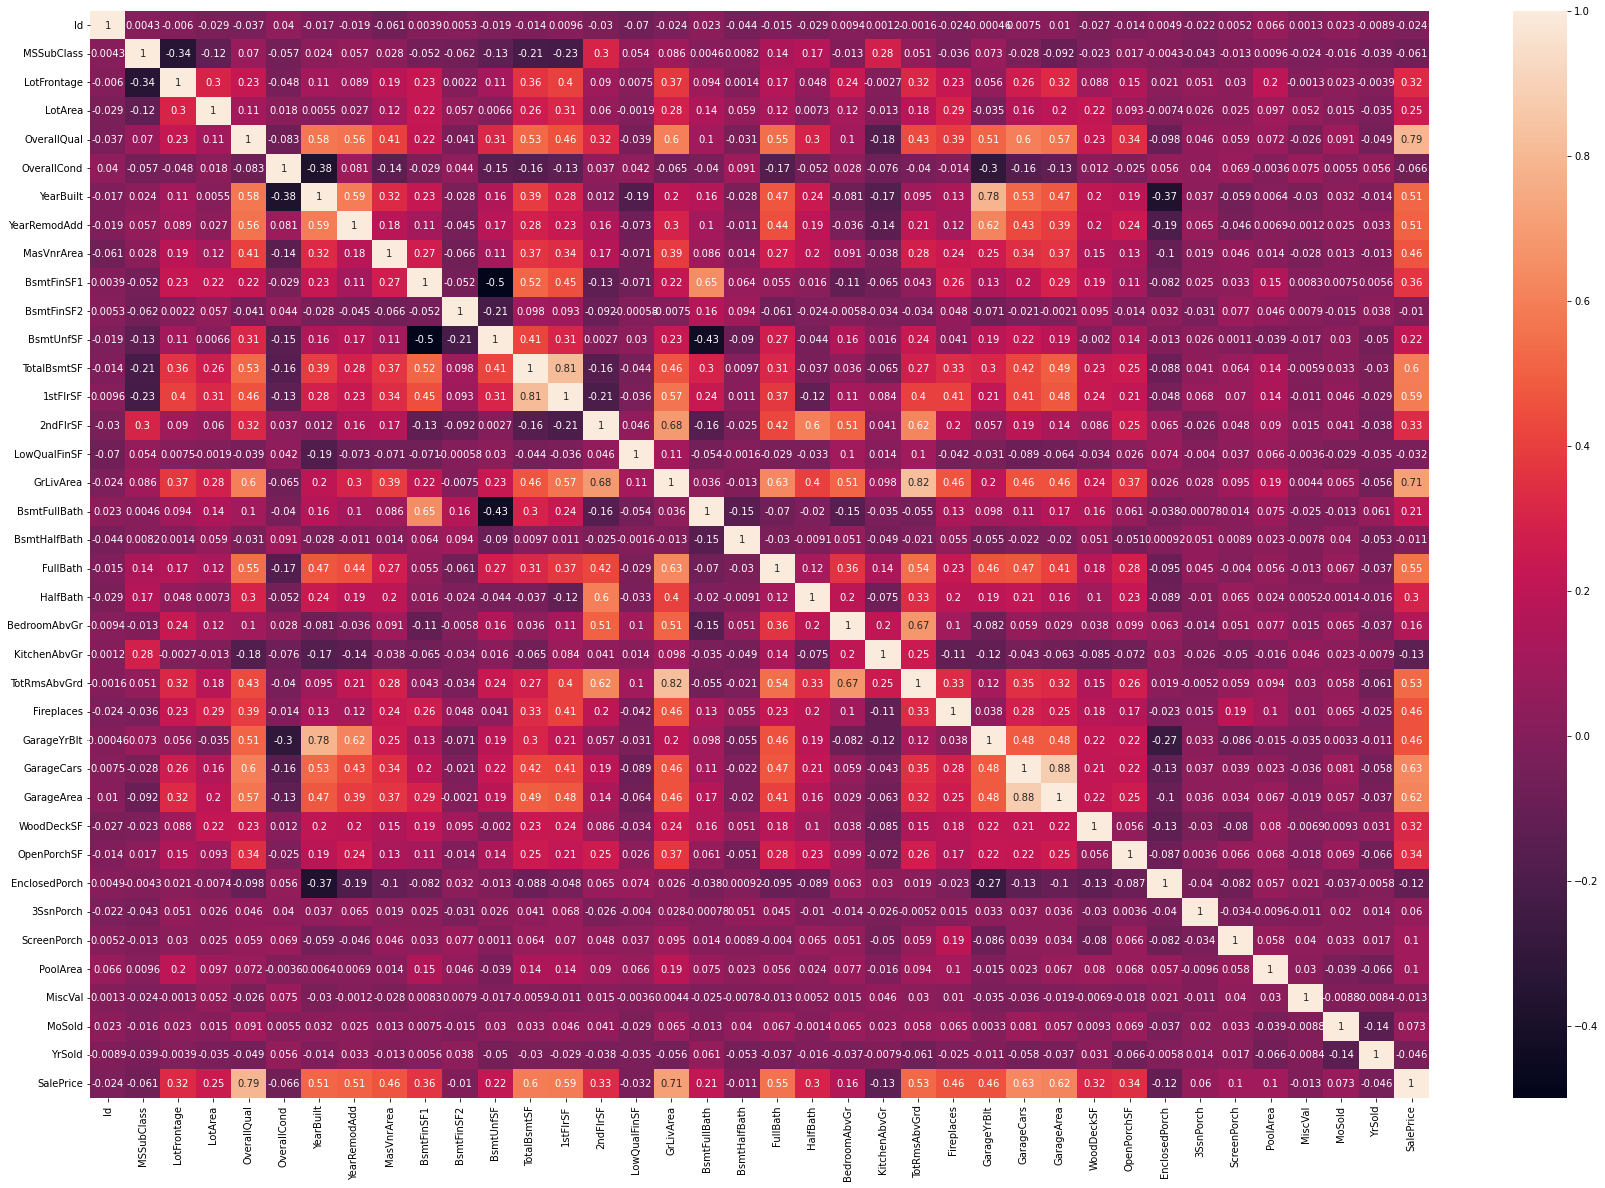

In [24]:
plt.figure(figsize=(30,20))
sns.heatmap(data.corr(),annot=True)

In [25]:
data.corr()["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.789185
GrLivArea        0.707300
GarageCars       0.628329
GarageArea       0.619000
TotalBsmtSF      0.595042
1stFlrSF         0.587642
FullBath         0.554988
TotRmsAbvGrd     0.528363
YearBuilt        0.514408
YearRemodAdd     0.507831
MasVnrArea       0.463626
Fireplaces       0.459611
GarageYrBlt      0.458007
BsmtFinSF1       0.362874
OpenPorchSF      0.339500
2ndFlrSF         0.330386
LotFrontage      0.323779
WoodDeckSF       0.315444
HalfBath         0.295592
LotArea          0.249499
BsmtUnfSF        0.215724
BsmtFullBath     0.212924
BedroomAbvGr     0.158281
PoolArea         0.103280
ScreenPorch      0.100284
MoSold           0.072764
3SsnPorch        0.060119
BsmtFinSF2      -0.010151
BsmtHalfBath    -0.011109
MiscVal         -0.013071
Id              -0.023897
LowQualFinSF    -0.032381
YrSold          -0.045508
MSSubClass      -0.060775
OverallCond     -0.065642
EnclosedPorch   -0.115004
KitchenAbvGr    -0.132108
Name: SalePr

# Bivariate Analysis

<AxesSubplot:xlabel='SalePrice', ylabel='OverallQual'>

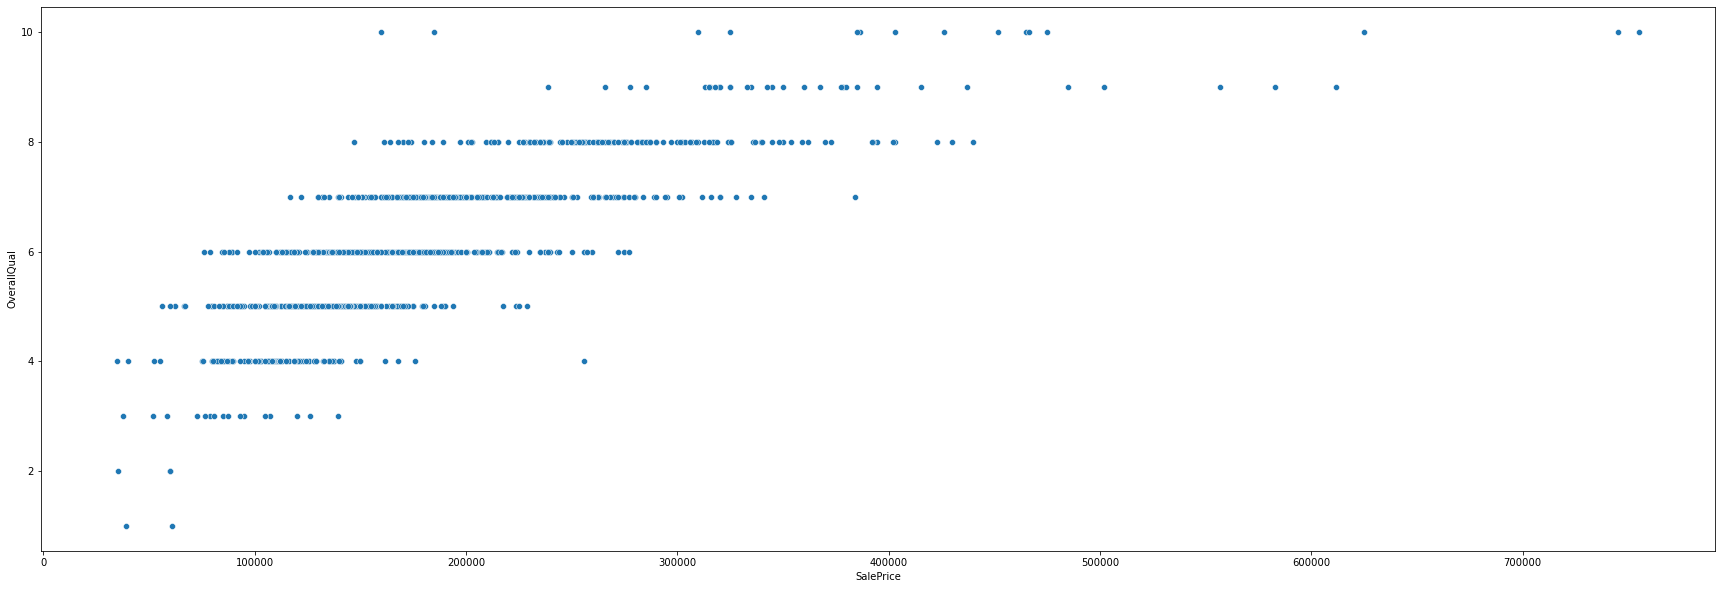

In [26]:
plt.figure(figsize=(30,10))
sns.scatterplot(data['SalePrice'],data['OverallQual'])

In [27]:
# OverallQual is Positively Correlated to Sale Price. with increase in OveralQuality the Sale Price is increases

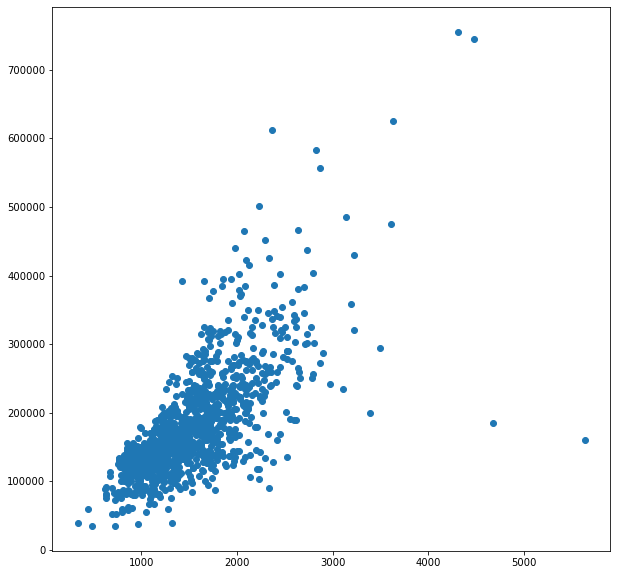

In [28]:
plt.figure(figsize=(10,10))
plt.scatter(data['GrLivArea'],data['SalePrice'])

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

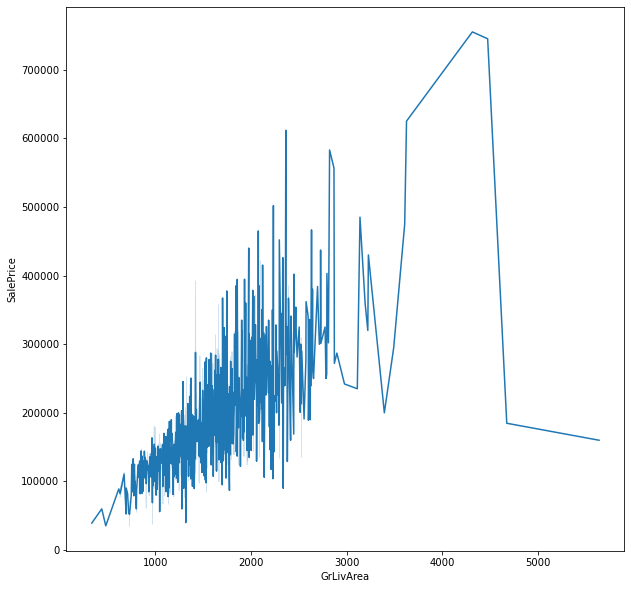

In [29]:
plt.figure(figsize=(10,10))
sns.lineplot(data['GrLivArea'],data['SalePrice'])

In [30]:
# living area square feet increases the SalePrice also Increases

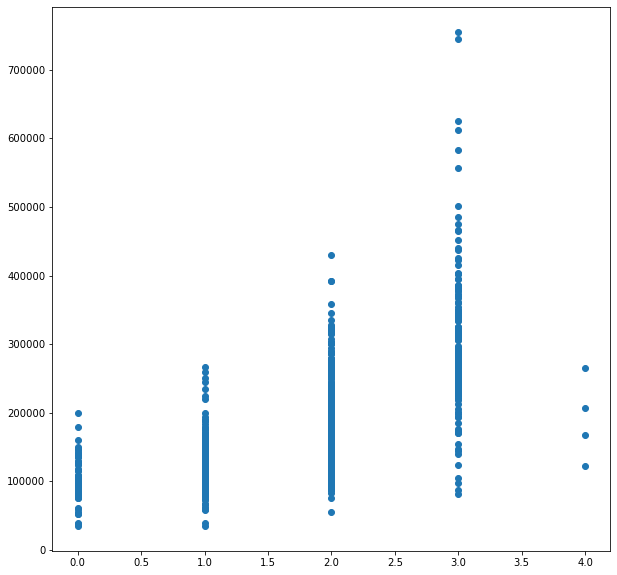

In [31]:
plt.figure(figsize=(10,10))
plt.scatter(data['GarageCars'],data['SalePrice'])

<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

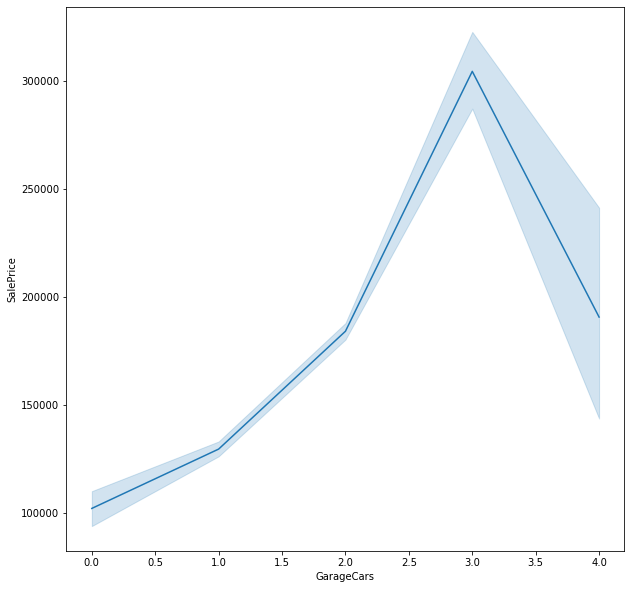

In [32]:
plt.figure(figsize=(10,10))
sns.lineplot(data['GarageCars'],data['SalePrice'])

In [33]:
# Garage Car Capacity is Highly Positively Correlated to House price.

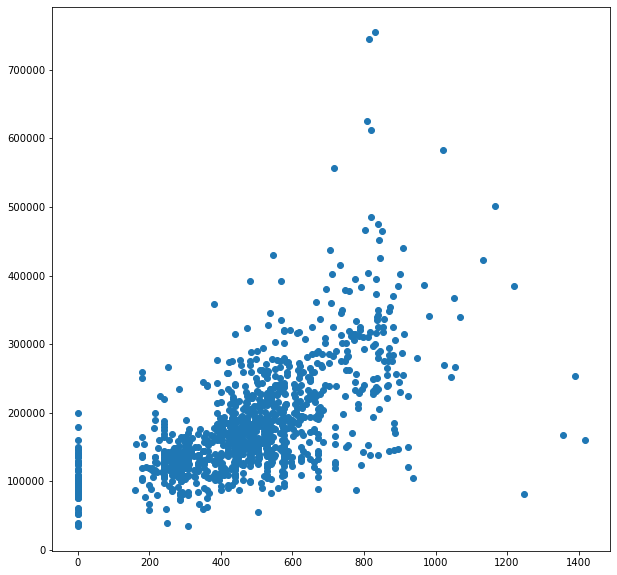

In [34]:
plt.figure(figsize=(10,10))
plt.scatter(data['GarageArea'],data['SalePrice'])

In [35]:
# Garage Area is also Highly Positively correlated to House price.

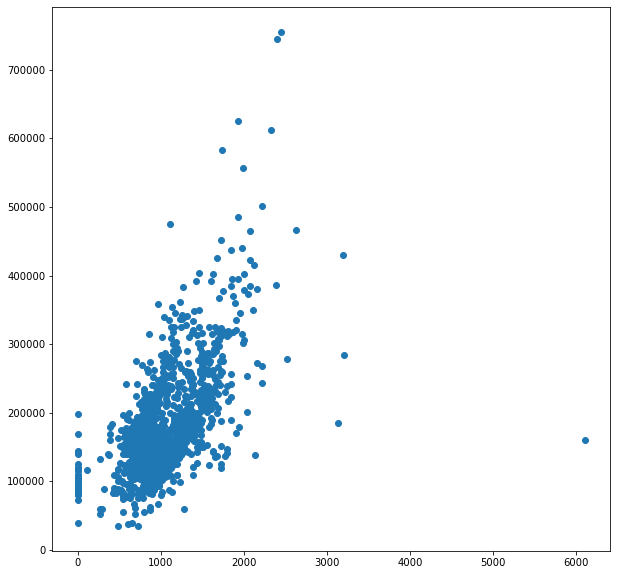

In [36]:
plt.figure(figsize=(10,10))
plt.scatter(data['TotalBsmtSF'],data['SalePrice'])

In [37]:
# Basement Area is also Positively Correlated to Sale Price

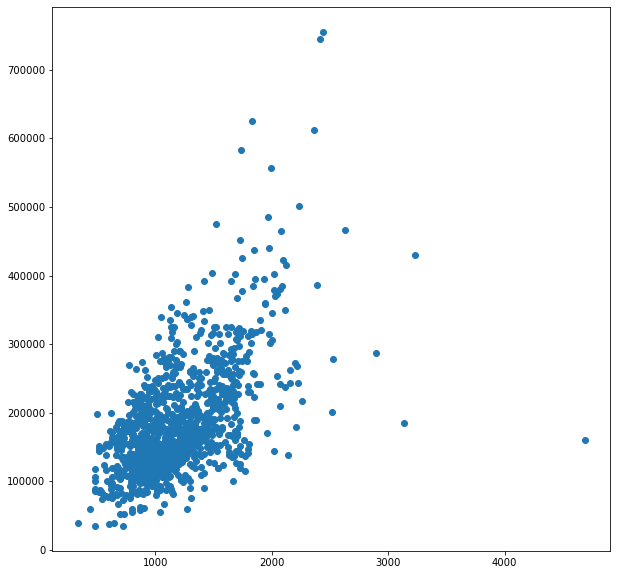

In [38]:
plt.figure(figsize=(10,10))
plt.scatter(data['1stFlrSF'],data['SalePrice'])

In [39]:
# First Floor in Square feet is also Positively Correlated to Sale Price

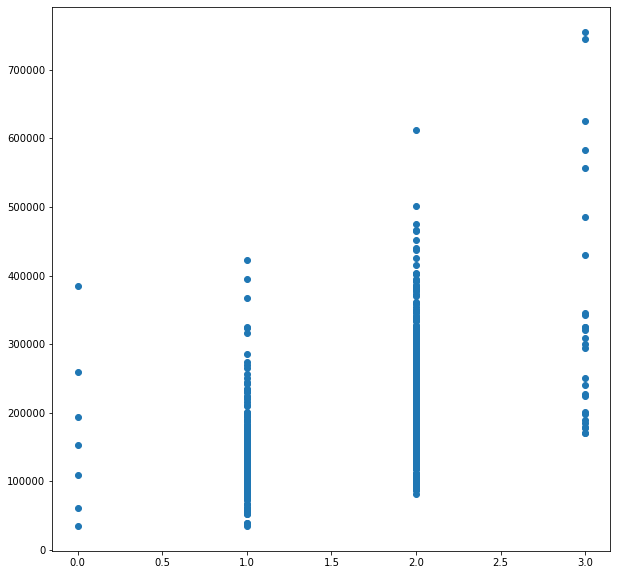

In [40]:
plt.figure(figsize=(10,10))
plt.scatter(data['FullBath'],data['SalePrice'])

In [41]:
# As the Full bathroom above ground increases the Price of house also increases its strong positive correlation

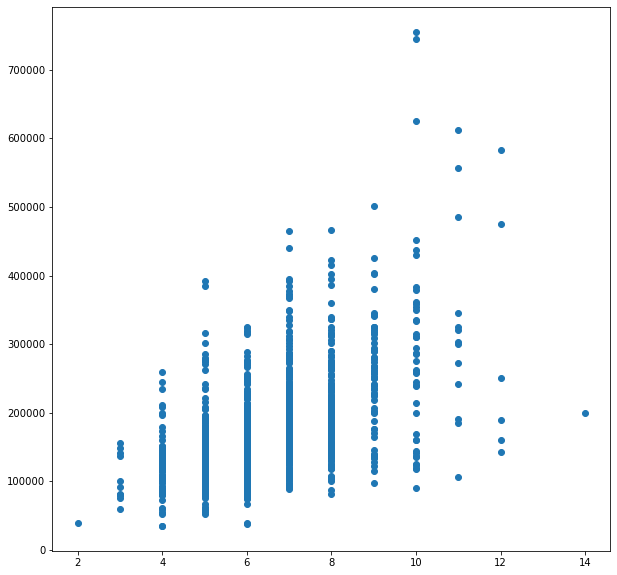

In [42]:
plt.figure(figsize=(10,10))
plt.scatter(data['TotRmsAbvGrd'],data['SalePrice'])

In [43]:
# As total rooms above ground increases the Price also increases strong positive correlation

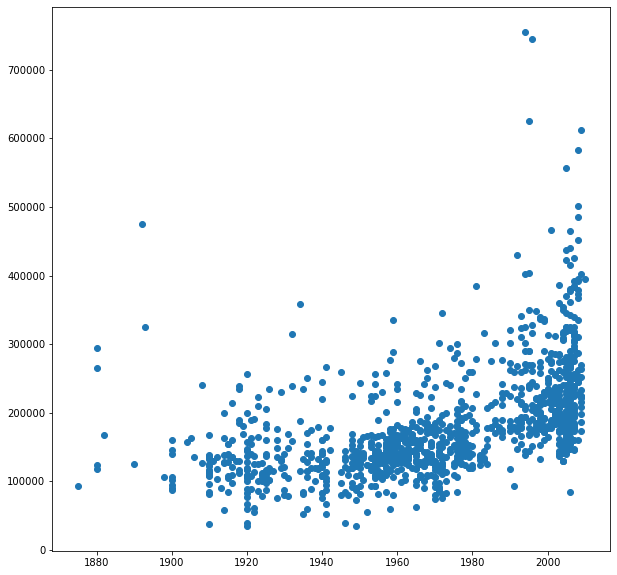

In [44]:
plt.figure(figsize=(10,10))
plt.scatter(data['YearBuilt'],data['SalePrice'])

In [45]:
# as the Year Increases price also increases . new house have higher price

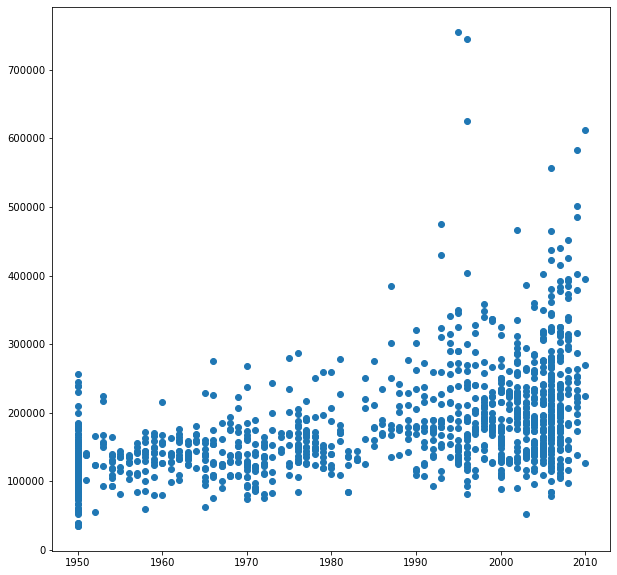

In [46]:
plt.figure(figsize=(10,10))
plt.scatter(data['YearRemodAdd'],data['SalePrice'])

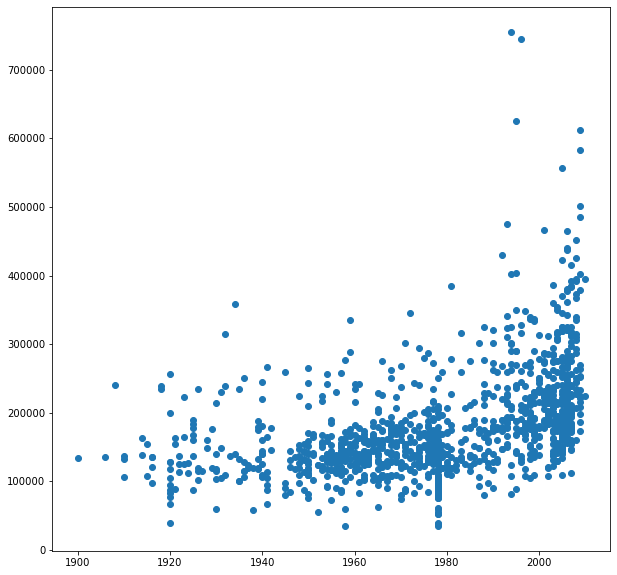

In [47]:
plt.figure(figsize=(10,10))
plt.scatter(data['GarageYrBlt'],data['SalePrice'])

In [48]:
# As the Garage built year increases the price of the house also increases

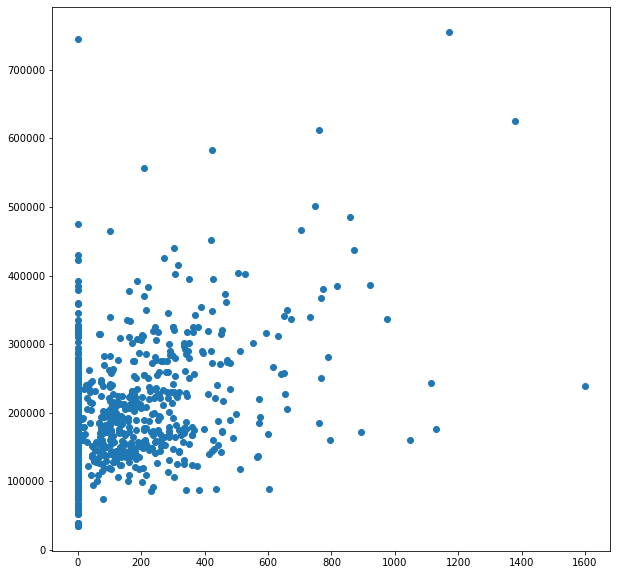

In [49]:
plt.figure(figsize=(10,10))
plt.scatter(data['MasVnrArea'],data['SalePrice'])

In [50]:
# Masonry veneer area increases the price also increases

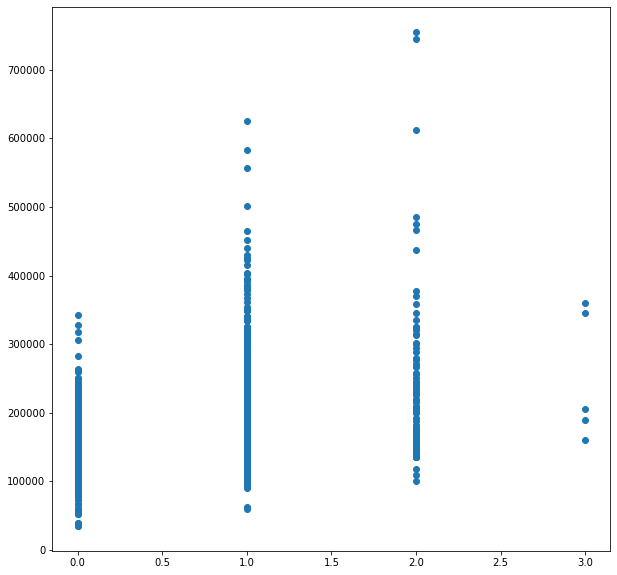

In [51]:
plt.figure(figsize=(10,10))
plt.scatter(data['Fireplaces'],data['SalePrice'])

In [52]:
# As the number of fireplaces increases the price also increases

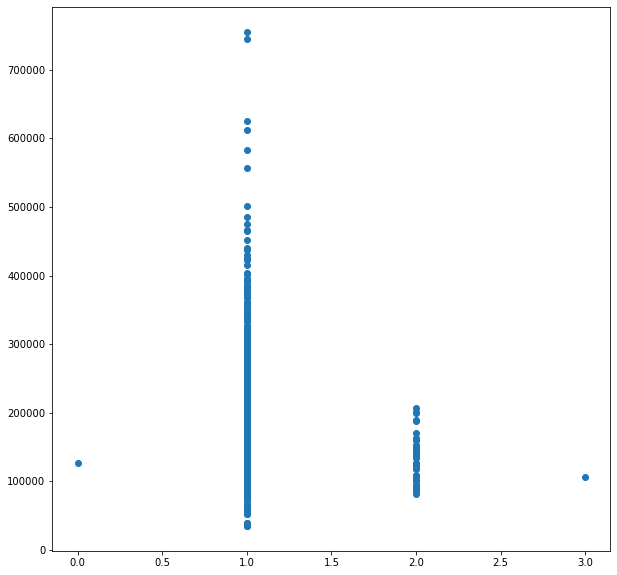

In [53]:
plt.figure(figsize=(10,10))
plt.scatter(data['KitchenAbvGr'],data['SalePrice'])

In [54]:
# As the kitchen above ground increases the price drops negative correlaton

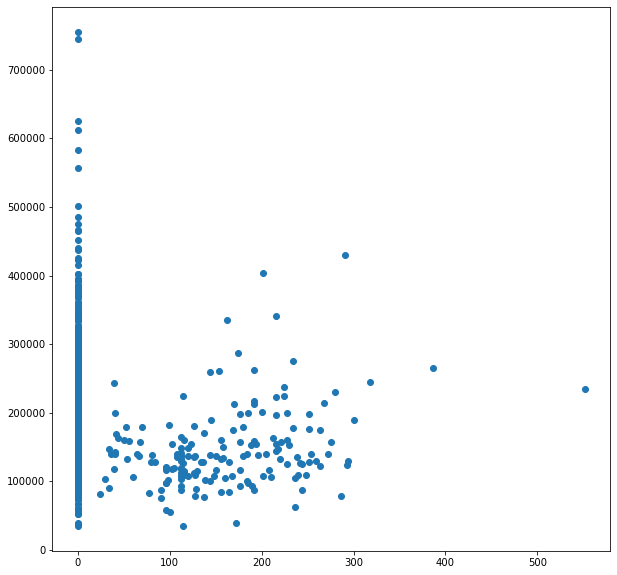

In [55]:
plt.figure(figsize=(10,10))
plt.scatter(data['EnclosedPorch'],data['SalePrice'])

In [56]:
# As the enclosed porch area increases the price decreases negative correlation

# Encoding

In [57]:
data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object
HeatingQC         object


In [58]:
a = data.columns.to_series().groupby(data.dtypes).groups
a

{int64: ['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'], float64: ['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], object: ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'G

In [59]:
# now i need to encode categorical data

In [60]:
temp=['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 
      'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 
      'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 
      'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
      'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 
      'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 
      'PavedDrive', 'Fence', 'SaleType', 'SaleCondition']

datai = pd.DataFrame()

for i in temp:
    datai[i] = data[i]

In [61]:
b = pd.get_dummies(datai)

In [62]:
data.drop(temp,inplace=True,axis=1)

In [63]:
data.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [64]:
# succesfully converted all object data to numeric data

# Skewness

In [65]:
datan = data.drop('SalePrice',axis=1)

In [66]:
datan.skew().sort_values(ascending=False)

MiscVal          23.065943
PoolArea         13.243711
LotArea          10.659285
3SsnPorch         9.770611
LowQualFinSF      8.666142
BsmtFinSF2        4.365829
KitchenAbvGr      4.365259
BsmtHalfBath      4.264403
ScreenPorch       4.105741
EnclosedPorch     3.043610
MasVnrArea        2.834658
LotFrontage       2.710383
OpenPorchSF       2.410840
BsmtFinSF1        1.871606
TotalBsmtSF       1.744591
1stFlrSF          1.513707
WoodDeckSF        1.504929
GrLivArea         1.449952
MSSubClass        1.422019
BsmtUnfSF         0.909057
2ndFlrSF          0.823479
Fireplaces        0.671966
HalfBath          0.656492
TotRmsAbvGrd      0.644657
BsmtFullBath      0.627106
OverallCond       0.580714
BedroomAbvGr      0.243855
MoSold            0.220979
GarageArea        0.189665
OverallQual       0.175082
YrSold            0.115765
FullBath          0.057809
Id                0.026526
GarageCars       -0.358556
YearRemodAdd     -0.495864
YearBuilt        -0.579204
GarageYrBlt      -0.662934
d

array([[<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Freq

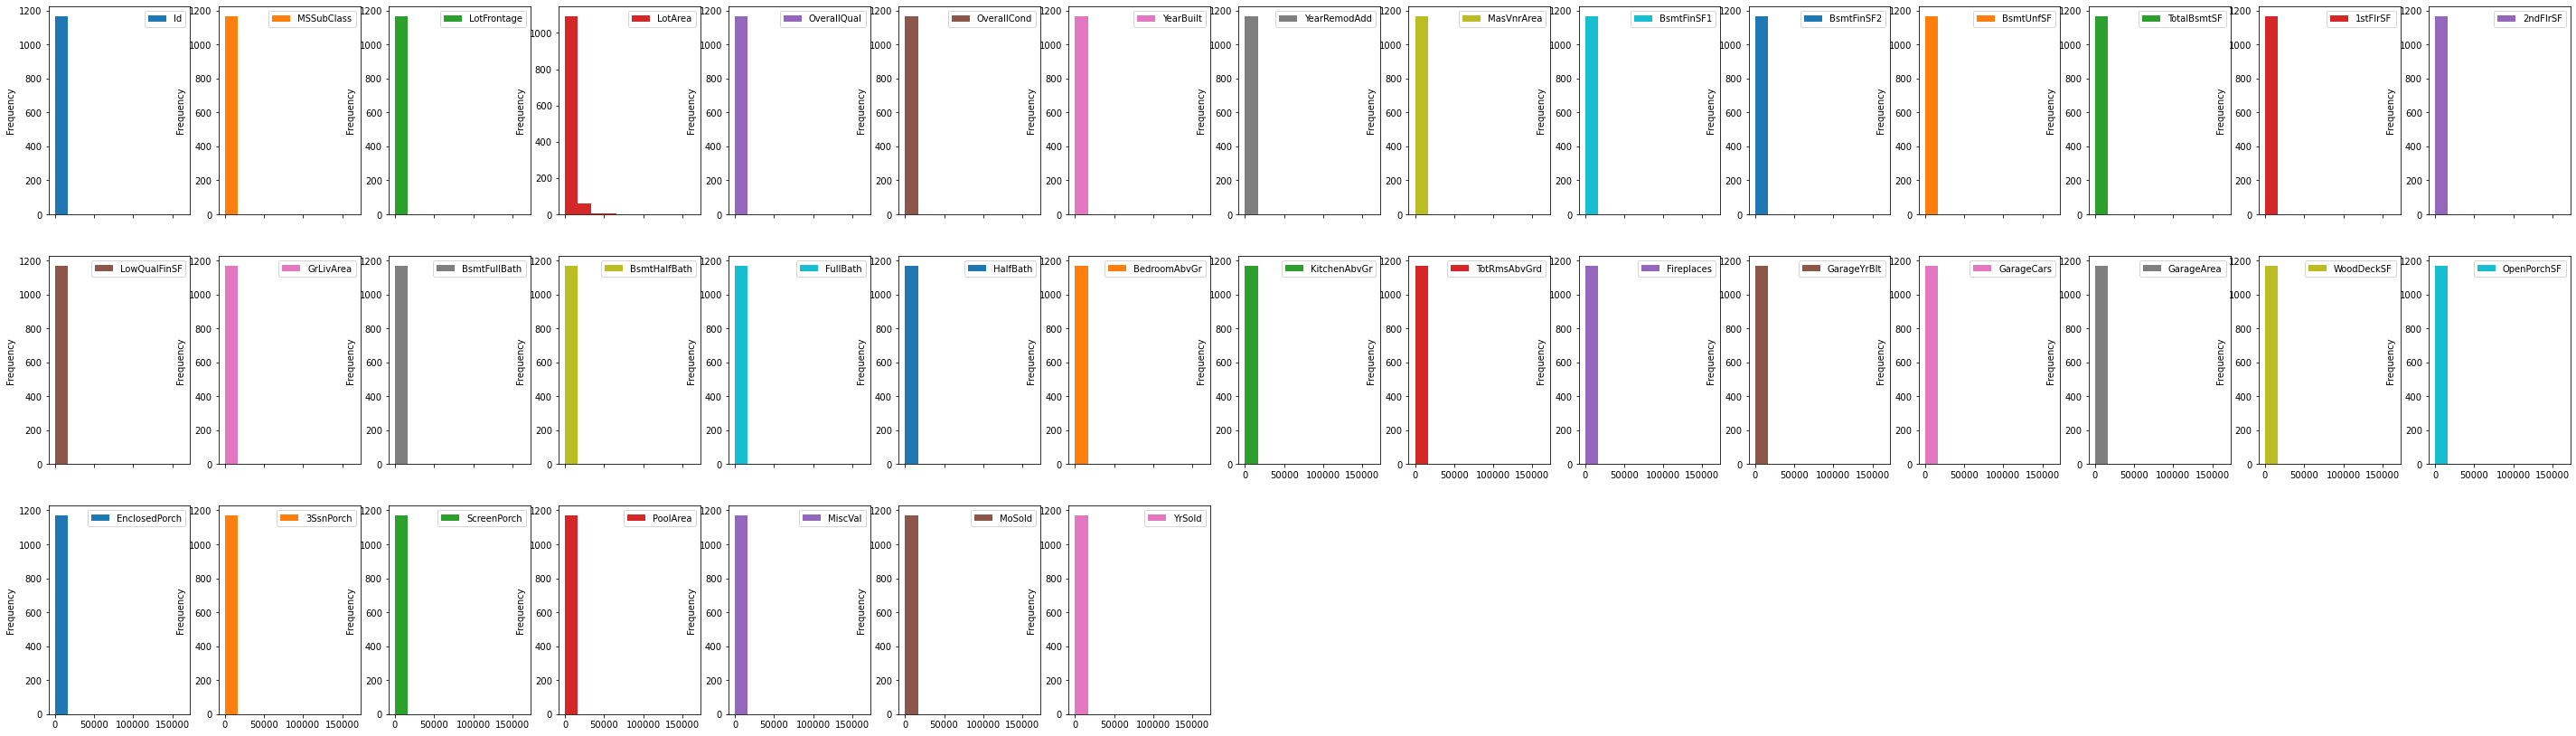

In [67]:
datan.plot(kind="hist",subplots=True,layout=(10,15),figsize=(50,50))

In [68]:
from sklearn.preprocessing import power_transform
pt = power_transform(datan)
datas = pd.DataFrame(pt,columns=datan.columns)
datas.skew().sort_values(ascending=False)

PoolArea         12.817372
3SsnPorch         7.087955
LowQualFinSF      6.922843
MiscVal           4.991071
BsmtHalfBath      3.954345
ScreenPorch       3.067153
BsmtFinSF2        2.394737
EnclosedPorch     2.022616
HalfBath          0.498003
MasVnrArea        0.416370
BsmtFullBath      0.365488
TotalBsmtSF       0.286779
2ndFlrSF          0.280208
LotFrontage       0.161368
BedroomAbvGr      0.116498
WoodDeckSF        0.113026
YrSold            0.112893
Fireplaces        0.084950
MSSubClass        0.064007
OverallCond       0.048063
LotArea           0.032509
OverallQual       0.021658
TotRmsAbvGrd      0.002332
GrLivArea        -0.000054
1stFlrSF         -0.002391
OpenPorchSF      -0.002749
GarageCars       -0.022970
MoSold           -0.035838
FullBath         -0.045944
YearBuilt        -0.126641
GarageYrBlt      -0.132523
YearRemodAdd     -0.225131
Id               -0.268486
BsmtUnfSF        -0.284390
GarageArea       -0.320370
BsmtFinSF1       -0.404528
KitchenAbvGr     -2.370593
d

# Outliers Removal

In [69]:
from scipy.stats import zscore

In [70]:
z = np.abs(datas)


In [71]:
np.where(z>4)

(array([   4,    8,   20,   32,   33,   34,   39,   39,   42,   48,   48,
          48,   48,   51,   63,   64,   66,   67,   72,   76,   76,   94,
          94,   98,   98,  103,  109,  113,  120,  133,  137,  141,  146,
         156,  156,  157,  162,  164,  166,  170,  187,  196,  205,  206,
         214,  219,  226,  228,  228,  243,  247,  253,  257,  257,  262,
         272,  290,  301,  305,  307,  310,  313,  318,  320,  333,  351,
         372,  385,  401,  402,  403,  408,  415,  417,  433,  445,  459,
         463,  467,  478,  478,  479,  482,  488,  500,  501,  518,  534,
         535,  541,  544,  549,  560,  563,  572,  572,  592,  592,  592,
         592,  592,  592,  606,  612,  614,  614,  615,  637,  643,  657,
         673,  678,  685,  689,  691,  696,  707,  708,  714,  716,  721,
         722,  729,  749,  759,  766,  769,  788,  791,  791,  810,  813,
         824,  838,  846,  846,  866,  882,  887,  888,  889,  904,  908,
         920,  932,  942,  943,  951, 

In [72]:
dfo = datas[(z<4).all(axis=1)]

In [73]:
dfo.shape

(1017, 37)

In [74]:
datas.shape

(1168, 37)

# Data Loss

In [75]:
((1168-1017)/1168)*100

12.92808219178082

# Creating categorical dataframe

In [76]:
datac = b
datac["SalePrice"] = data["SalePrice"]
datac.drop(np.where(z>4)[0],axis=0,inplace=True)
datac.shape

(1017, 241)

# Standard Scaler

In [77]:
from sklearn.preprocessing import StandardScaler
sc  = StandardScaler()
s=sc.fit_transform(dfo)
datas = pd.DataFrame(s,columns=dfo.columns)

# Joining the dataframe

In [79]:
datap = dfo.join(datac)
datap.drop('SalePrice',axis=1,inplace=True)

In [81]:
datap.shape

(1017, 277)

# PCA

In [82]:
# Principal component analysis as no of columns are higher

In [83]:
from sklearn.decomposition import PCA
pca = PCA().fit(datap)

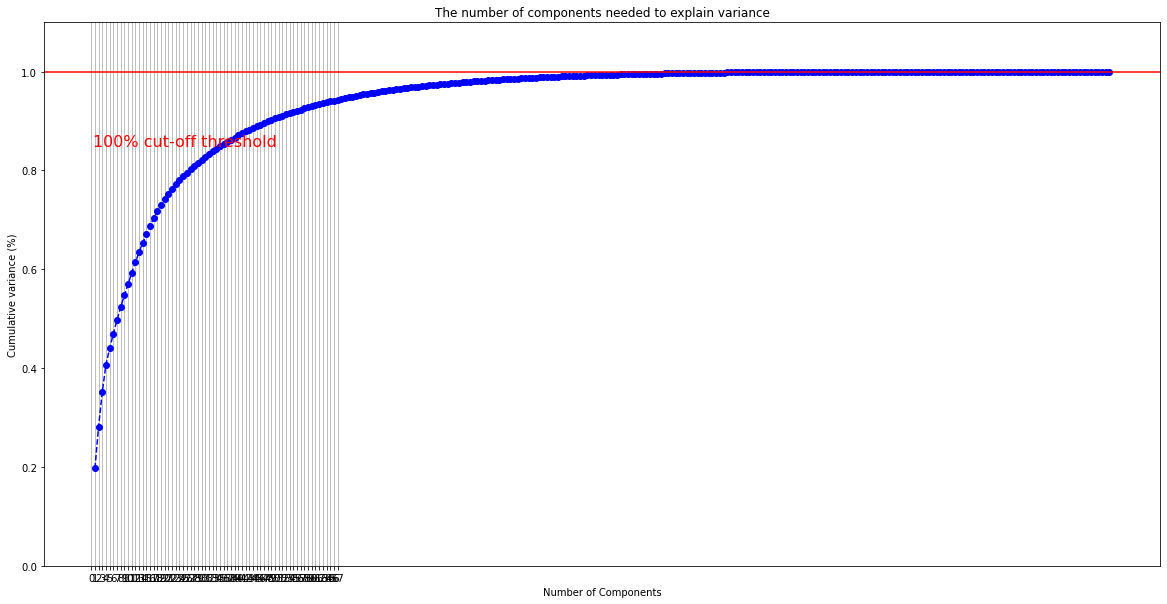

In [84]:
fig, ax = plt.subplots(figsize=(20,10))
xi = np.arange(1, 278, step=1)
yi = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 68, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=1, color='r', linestyle='-')
plt.text(0.5, 0.85, '100% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [85]:
datapca=pd.DataFrame()
datapca["x"] = xi
datapca["y"] = yi
datapca

,x,y
0,1,0.197075
1,2,0.281866
2,3,0.351993
3,4,0.406821
4,5,0.439792
5,6,0.469262
6,7,0.497374
7,8,0.523689
8,9,0.547084
9,10,0.569825


In [100]:
from sklearn.decomposition import PCA

pca = PCA(n_components=127)
datai=pca.fit_transform(datap)

data_new = pd.DataFrame(datai)

In [101]:
data_new.shape

(1017, 127)

# Multicolinearity Checking

In [88]:
# variance inflation factor

In [89]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif = pd.DataFrame()
vif["vif value"] = [variance_inflation_factor(data_new.values,a) for a in range(40)]
vif["feature names"] = data_new.columns

In [ ]:
vif.sort_values(by=["vif value"],ascending=False)

In [102]:
x_final = data_new
y = datac["SalePrice"]

# Model Training 

In [103]:
# Importing required libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

# cross val score and accuracy score

In [104]:
result = pd.DataFrame(columns=["Model Name","Train Score","Test Score","Cross Val Score"])
lin=[]
dec=[]
rid=[]
las=[]
kne=[]
rfr=[]
ada=[]
ela=[]
licol=[lin,dec,rid,las,kne,rfr,ada,ela]

algo = [LinearRegression(),DecisionTreeRegressor(),Ridge(),Lasso(),KNeighborsRegressor(),
        RandomForestRegressor(),AdaBoostRegressor(),ElasticNet()]
oo= 0    
for v in algo:
    r = 0
    acc = 0
    for i in range(0,25):
        al = v
        train_x,test_x,train_y,test_y = train_test_split(x_final,y,test_size=.20,random_state=i)
        al.fit(train_x,train_y)
        score = al.score(train_x,train_y)
        if score>acc:
            acc = score
            r = i
            
    print(f'the best random state is {r} for {v}')     
        
 
    train_x,test_x,train_y,test_y = train_test_split(x_final,y,test_size=.20,random_state=r)
    al.fit(train_x,train_y)
    trs = al.score(train_x,train_y)
    tss = al.score(test_x,test_y)
    cvs = cross_val_score(al,x_final,y,cv=KFold(5)).mean()   
    licol[oo].insert(0,v)
    licol[oo].insert(1,trs)
    licol[oo].insert(2,tss)
    licol[oo].insert(3,cvs)
    result.loc[oo] = licol[oo]
    oo+=1

final_result = result.sort_values(by=["Cross Val Score","Test Score"],ascending=False)

the best random state is 19 for LinearRegression()
the best random state is 0 for DecisionTreeRegressor()
the best random state is 19 for Ridge()
the best random state is 19 for Lasso()
the best random state is 15 for KNeighborsRegressor()
the best random state is 18 for RandomForestRegressor()
the best random state is 4 for AdaBoostRegressor()
the best random state is 19 for ElasticNet()


In [105]:
final_result

,Model Name,Train Score,Test Score,Cross Val Score
2,Ridge(),0.921639,0.807870,0.866929
3,Lasso(),0.921693,0.807696,0.865560
0,LinearRegression(),0.921694,0.807621,0.865447
7,ElasticNet(),0.865091,0.765151,0.833429
5,"(DecisionTreeRegressor(max_features=1.0, rando...",0.981118,0.749431,0.821833
4,KNeighborsRegressor(),0.886373,0.714185,0.809029
6,"(DecisionTreeRegressor(max_depth=3, random_sta...",0.893445,0.732042,0.769418
1,DecisionTreeRegressor(),1.000000,0.690369,0.628749


In [106]:
final_result.loc[2]["Model Name"]

Ridge()

# Support vector classifier

In [107]:
svr = SVR()
train_x,test_x,train_y,test_y = train_test_split(x_final,y,test_size=.20,random_state=19)
al=svr.fit(train_x,train_y)
trs = al.score(train_x,train_y)
tss = al.score(test_x,test_y)
cvs = cross_val_score(svr,x_final,y,cv=KFold(5)).mean()
print(f'the training score is {trs} the testing score is {tss} the cross val score is {cvs} ') 

the training score is -0.053447257789625446 the testing score is -0.056442247817738656 the cross val score is -0.07029971145542277 


In [108]:
# from all the classifier models Ridge performed best with testing score of 80 % and cross val score of 86 %

# HyperParameter Tunining

In [109]:
from sklearn.model_selection import GridSearchCV

In [111]:
rid = Ridge()
parameters = {'alpha': [0.0001,0.001,0.01,0.1,1,1.5,2],
 'fit_intercept': [True,False],
 'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg','sag', 'saga', 'lbfgs'],
 'max_iter': [None,1000,1500,15000,2000]}
train_x,test_x,train_y,test_y = train_test_split(x_final,y,test_size=.20,random_state=19)
gsv = GridSearchCV(rid,parameters)
gsv.fit(train_x,train_y)
gsv.best_params_

{'alpha': 2, 'fit_intercept': True, 'max_iter': 1000, 'solver': 'saga'}

In [112]:
gsv.best_params_

{'alpha': 2, 'fit_intercept': True, 'max_iter': 1000, 'solver': 'saga'}

In [113]:
# using the best parameters got in grid search

In [115]:
rid = Ridge(alpha=2,fit_intercept=True,max_iter=1000,solver='saga')
train_x,test_x,train_y,test_y = train_test_split(x_final,y,test_size=.15,random_state=19)
rid.fit(train_x,train_y)
trs = rid.score(train_x,train_y)
tss = rid.score(test_x,test_y)
pred = rid.predict(test_x)
cvs = cross_val_score(rid,x_final,y).mean()
print(f'the training score is {trs} the testing score is {tss} the cross val score is {cvs}')
print("Mean Squared Error",mean_squared_error(test_y,pred))
print("Mean Absolute Error", mean_absolute_error(test_y,pred))
print("Root Mean Squared Error", np.sqrt(mean_squared_error(test_y,pred)))
print("R2 Score", r2_score(test_y,pred))

the training score is 0.9016550452127747 the testing score is 0.8754474822727083 the cross val score is 0.8682281136069763
Mean Squared Error 708533344.0484647
Mean Absolute Error 18514.514455942237
Root Mean Squared Error 26618.289652952248
R2 Score 0.8754474822727083


In [116]:
# The Training score is 90% , Testing Score 87% and Cross val score is 87%

# Saving the model

In [118]:
import joblib
joblib.dump(rid,"House Price Prediction.pkl")

['House Price Prediction.pkl']

# Now using the test data set to predict

In [119]:
# importing requried libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [120]:
data = pd.read_csv("test.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,Corner,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,2005,2006,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1249,Unf,0,673,1922,GasA,Ex,Y,SBrkr,1922,0,0,1922,1,0,2,0,3,1,Gd,8,Typ,1,Gd,Attchd,2005.0,Fin,3,676,TA,TA,Y,178,51,0,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,Gd,TA,Av,GLQ,1036,Unf,0,184,1220,GasA,Gd,Y,SBrkr,1360,0,0,1360,1,0,1,0,1,1,Gd,4,Typ,1,Ex,Attchd,1984.0,RFn,2,565,TA,TA,Y,63,0,0,0,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2001,2001,Hip,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1753,1753,GasA,Ex,Y,SBrkr,1788,0,0,1788,0,0,2,0,3,1,Ex,7,Typ,1,TA,Attchd,2001.0,RFn,2,522,TA,TA,Y,202,151,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,7,1941,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,275,Unf,0,429,704,GasA,Ex,Y,SBrkr,860,704,0,1564,0,0,1,1,3,1,Fa,7,Typ,1,Gd,Attchd,1941.0,Unf,1,234,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Somerst,Feedr,Norm,1Fam,2Story,6,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,74.0,Gd,TA,PConc,Gd,TA,Mn,Unf,0,Unf,0,894,894,GasA,Ex,Y,SBrkr,894,1039,0,1933,0,0,2,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2007.0,Fin,3,668,TA,TA,Y,100,18,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [121]:
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

# Null value check

<AxesSubplot:>

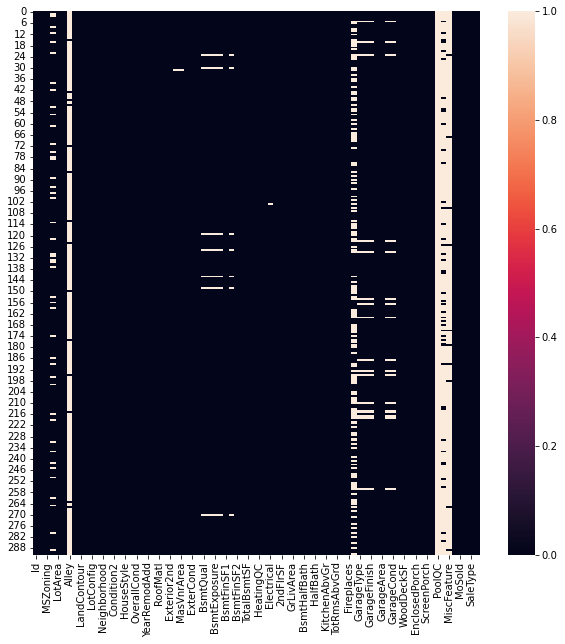

In [122]:
plt.figure(figsize=(10,10))
sns.heatmap(data.isnull())

In [123]:
data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage       45
LotArea            0
Street             0
Alley            278
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         1
MasVnrArea         1
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           7
BsmtCond           7
BsmtExposure       7
BsmtFinType1       7
BsmtFinSF1         0
BsmtFinType2       7
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

# Null value treatment

In [124]:
data.drop(["PoolQC","MiscFeature","Alley"],inplace=True,axis=1)

cat=["Fence","FireplaceQu","GarageFinish","GarageType","GarageQual","BsmtExposure",
"BsmtFinType2","BsmtQual","BsmtCond","BsmtFinType1",
"MasVnrType","GarageCond"]
num=["LotFrontage","GarageYrBlt","MasVnrArea"]

from sklearn.impute import SimpleImputer

sii = SimpleImputer(strategy="mean")
siii = SimpleImputer(strategy= "most_frequent")
    
for c in cat:
    data[c]  = siii.fit_transform(data[c].values.reshape(-1,1))

for n in num:
    data[n]=sii.fit_transform(data[n].values.reshape(-1,1))

In [125]:
data.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       1
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

# Encoding

In [126]:
data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object
HeatingQC         object


In [127]:
temp=['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 
      'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 
      'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 
      'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
      'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 
      'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 
      'PavedDrive', 'Fence', 'SaleType', 'SaleCondition']

datai = pd.DataFrame()

for i in temp:
    datai[i] = data[i]

a = pd.get_dummies(datai)

data.drop(temp,inplace=True,axis=1)

In [128]:
data.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
dtype: object

# Skewness

In [129]:
data.skew().sort_values(ascending=False)

MiscVal          13.264758
LotArea          12.781805
3SsnPorch        12.277476
LowQualFinSF     10.929928
KitchenAbvGr      4.849432
ScreenPorch       4.182351
BsmtFinSF2        3.698543
BsmtHalfBath      3.544994
EnclosedPorch     3.177046
OpenPorchSF       2.185030
MasVnrArea        1.976804
WoodDeckSF        1.708221
MSSubClass        1.358597
OverallCond       1.209714
GrLivArea         1.010586
BsmtUnfSF         0.960708
TotRmsAbvGrd      0.805535
2ndFlrSF          0.765511
HalfBath          0.758892
BsmtFinSF1        0.739790
1stFlrSF          0.692047
Fireplaces        0.540164
TotalBsmtSF       0.519257
LotFrontage       0.466813
BsmtFullBath      0.463685
OverallQual       0.397312
MoSold            0.186504
GarageArea        0.133547
BedroomAbvGr      0.075315
YrSold            0.018412
PoolArea          0.000000
FullBath         -0.049800
Id               -0.108806
GarageCars       -0.280324
YearRemodAdd     -0.535600
GarageYrBlt      -0.683042
YearBuilt        -0.755233
d

In [130]:
from sklearn.preprocessing import power_transform
pt = power_transform(data)
datas = pd.DataFrame(pt,columns=data.columns)
datas.skew().sort_values(ascending=False)

3SsnPorch        12.020386
LowQualFinSF      9.763295
MiscVal           5.148542
BsmtHalfBath      3.544994
ScreenPorch       3.331084
BsmtFinSF2        2.570199
EnclosedPorch     2.165535
HalfBath          0.621093
MasVnrArea        0.363253
BsmtFullBath      0.341330
2ndFlrSF          0.284246
WoodDeckSF        0.210102
BedroomAbvGr      0.143193
LotFrontage       0.096846
MSSubClass        0.089921
Fireplaces        0.076669
YrSold            0.015858
LotArea           0.003111
PoolArea          0.000000
KitchenAbvGr      0.000000
GrLivArea        -0.000307
TotRmsAbvGrd     -0.000469
1stFlrSF         -0.000548
OverallQual      -0.002016
GarageCars       -0.030495
TotalBsmtSF      -0.037982
MoSold           -0.053915
OpenPorchSF      -0.058951
FullBath         -0.064123
OverallCond      -0.079098
GarageYrBlt      -0.138287
YearBuilt        -0.171084
YearRemodAdd     -0.227509
BsmtUnfSF        -0.232099
Id               -0.359374
GarageArea       -0.361092
BsmtFinSF1       -0.441605
d

# Outlier removal

In [132]:
from scipy.stats import zscore

z = np.abs(datas)

np.where(z>4)

(array([ 23,  67,  82,  85, 105, 125, 157, 171, 179, 179, 184, 189, 198,
        199, 215, 266, 273, 286, 289], dtype=int64),
 array([34, 34, 21, 15, 34, 34, 15, 34, 31, 34, 12, 34, 34, 21, 15, 34,  3,
        31, 34], dtype=int64))

In [133]:
dfo = datas[(z<4).all(axis=1)]

print(dfo.shape)

print(datas.shape)

(274, 37)
(292, 37)


In [135]:
# Data Loss

((292-274)/292)*100

6.164383561643835

In [136]:
# Creating Categorical Dataframe

In [137]:
datac = a
datac.drop(np.where(z>4)[0],axis=0,inplace=True)
datac.shape

(274, 211)

# Standard Scaler

In [138]:
from sklearn.preprocessing import StandardScaler

sc  = StandardScaler()
s=sc.fit_transform(dfo)
datas = pd.DataFrame(s,columns=dfo.columns)

In [139]:
# Joining the dataframe

datap = dfo.join(datac)

datap.shape

(274, 248)

# PCA

In [140]:
from sklearn.decomposition import PCA

pca = PCA(n_components=127)
datai=pca.fit_transform(datap)

data_new = pd.DataFrame(datai)

data_new.shape

(274, 127)

In [141]:
import joblib
model = joblib.load("House Price Prediction.pkl")

In [142]:
pred = model.predict(data_new)

In [143]:
prediction = pd.DataFrame(pred)
prediction.head()

,0
0,288504.823120
1,199429.381794
2,265896.820230
3,108842.223375
4,256351.527961


In [144]:
prediction.to_csv("House price predicted.csv")